#  Load the libraries

In [205]:

import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
import warnings # To remove any random warnings
warnings.filterwarnings(action = 'ignore') # Commands which helps to remove the warnings

# Enter Input File Path For EDA  Analysis 

In [206]:
 Input_FilePath=input("Please enter source file name for which you want to perform EDA analysis") #Please enter the input file path for EDA analysis

Please enter source file name for which you want to perform EDA analysisC:\Users\chand\OneDrive\Desktop\Project\Lending Club Assignment_Loan RIsk Analysis\loan\loan.csv


# Importing the loan data

In [207]:
loan_data = pd.read_csv(Input_FilePath) #Loading Data using pandas library

# Data Understanding

In [208]:
### Data Understanding using data dictonary

loan_data.head()

#The aim is to identify risky loan applicants so that such loans can be reduced thereby cutting down the amount of credit loss. 

#We will use EDA to identify such applications.

#What are the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default ?

#Lets try to understand with the approach below.

#Solution - EDA



,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [209]:
### Checking the total rows and columns before data cleaning

loan_data.shape


(39717, 111)

In [210]:
# Know the type of data

print(loan_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


In [211]:
#Data Sanity check begins...
#Step 1: identifying the columns with missing values

100*loan_data.isnull().mean()

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [212]:
#Observation from above : Few columns with 100% missing values have been identified below

#Step 2: Checking the mean and standard deviation of the data.

loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [213]:
#Observation from above : Few column with values NaN can be seen


# Data cleaning 

In [214]:
#Data cleaning begins here...

#Step 1:
# Firstly we will filter data based on loan_status as we only want consider those borrowers who have defaulted/not defaulted ( loan_status = Fully Paid/Charged off)
# We will not consider borrowers who are currently paying the loan ( loan_status = Current )

print ("Dropping rows with loan status as Current")

loan_data.drop(loan_data[loan_data['loan_status'] == 'Current'].index, inplace = True)

print(loan_data.shape)


Dropping rows with loan status as Current
(38577, 111)


In [215]:
#Data cleaning cont...
#Step 2:
#Drop columns which are related to customer behavior as this data is not available at the time of loan application

customer_behavior_cols = ['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type']

loan_data.drop(customer_behavior_cols, axis = 1, inplace=True)

print("The final columns",loan_data.shape)

The final columns (38577, 90)


In [216]:
#Setting the missing value columns in a list, two lists have been used as single list was too large
#This has already been identifying using sanity check above

missingv_cols_possibility1 = ['total_il_high_credit_limit','total_bc_limit','total_bal_ex_mort','tot_hi_cred_lim','percent_bc_gt_75','pct_tl_nvr_dlq','num_tl_op_past_12m','num_tl_30dpd','num_tl_90g_dpd_24m','num_sats','num_tl_120dpd_2m','num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0','num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl','mths_since_recent_inq','mths_since_recent_revol_delinq','num_accts_ever_120_pd']

missingv_cols_possibility2=['num_actv_bc_tl','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','mort_acc','mths_since_recent_bc','mths_since_recent_bc_dlq','mo_sin_old_il_acct','mo_sin_old_rev_tl_op','max_bal_bc','all_util','total_rev_hi_lim','inq_fi','total_cu_tl','inq_last_12m','acc_open_past_24mths','avg_cur_bal','bc_open_to_buy','bc_util','tot_coll_amt','tot_cur_bal','open_acc_6m','open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','annual_inc_joint','dti_joint','verification_status_joint','mths_since_last_major_derog','mths_since_last_major_derog','next_pymnt_d']


In [217]:
#Data cleaning cont...
#Step 3:
#Dropping the missing value columns

loan_data.drop(missingv_cols_possibility1, axis = 1, inplace=True)
loan_data.drop(missingv_cols_possibility2, axis = 1, inplace=True)

print("The final columns",loan_data.shape)


The final columns (38577, 35)


In [218]:
#Data cleaning cont...
#Step 4:
#Dropping those columns which have single unique value as it would not impact the analysis ( no variation in data )

unique_value_cols =['pymnt_plan','initial_list_status','policy_code','policy_code','acc_now_delinq','delinq_amnt']

loan_data.drop(unique_value_cols, axis = 1, inplace=True)




In [219]:
print("The final columns",loan_data.shape)
loan_data.head()

The final columns (38577, 30)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,title,zip_code,addr_state,dti,mths_since_last_delinq,mths_since_last_record,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,Computer,860xx,AZ,27.65,NaN,NaN,0.0,0.0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,bike,309xx,GA,1.00,NaN,NaN,0.0,0.0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,real estate business,606xx,IL,8.72,NaN,NaN,0.0,0.0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,personel,917xx,CA,20.00,35.0,NaN,0.0,0.0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,My wedding loan I promise to pay back,852xx,AZ,11.20,NaN,NaN,0.0,0.0,0.0,0.0


In [220]:
#Doing sanity check again...
100*loan_data.isnull().mean()

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.185033
emp_length                     2.677761
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
url                            0.000000
desc                          32.472717
purpose                        0.000000
title                          0.028514
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000
mths_since_last_delinq        64.559193


In [221]:
#Data cleaning cont...
#Step 5: 
#Doing the final sanity check and verifying if still any rows and columns need to be removed
#Here 'mths_since_last_record' column still has missing value percenatge >85%, hence removing it ( as observed above mths_since_last_record: 92.897322)
#Also, zip code information is not complete, so this data might not be able to help us with anaylsis
#url also doesn't help us in identifying defaulters, so removing it 

loan_data.drop('mths_since_last_record', axis = 1, inplace=True)
loan_data.drop('zip_code', axis = 1, inplace=True)
loan_data.drop('url', axis = 1, inplace=True)

In [222]:
#Data cleaning

#Step:6
#Removing '%' sign from int_rate,'months' from term as mean value is not coming for them and extracting only MONTH from issue_d 

#int_rate
loan_data['int_rate'] = loan_data['int_rate'].str.replace('%', '')

#term
loan_data['term']=loan_data['term'].str.replace('months','')

#issue_d
#loan_data['issue_d']=pd.DatetimeIndex(loan_data["issue_d"]).month







In [223]:
#Final rows and columns
loan_data.shape
loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,mths_since_last_delinq,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
count,3.857700e+04,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,13672.000000,38521.0,38521.0,37880.000000,38538.0
mean,6.763787e+05,8.422843e+05,11047.025430,10784.058506,10222.481123,322.466318,6.877797e+04,13.272727,35.882534,0.0,0.0,0.043479,0.0
std,2.092639e+05,2.644519e+05,7348.441646,7090.306027,7022.720644,208.639215,6.421868e+04,6.673044,22.028093,0.0,0.0,0.204583,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.0,0.0,0.000000,0.0
25%,5.120330e+05,6.611310e+05,5300.000000,5200.000000,5000.000000,165.740000,4.000000e+04,8.130000,18.000000,0.0,0.0,0.000000,0.0
50%,6.564230e+05,8.392920e+05,9600.000000,9550.000000,8733.440000,277.860000,5.886800e+04,13.370000,34.000000,0.0,0.0,0.000000,0.0
75%,8.291460e+05,1.037336e+06,15000.000000,15000.000000,14000.000000,425.550000,8.200000e+04,18.560000,52.000000,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,120.000000,0.0,0.0,2.000000,0.0


In [224]:
#Final columns in the dataset
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'desc', 'purpose', 'title', 'addr_state',
       'dti', 'mths_since_last_delinq', 'collections_12_mths_ex_med',
       'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [225]:
#Final dataset size
loan_data.shape

(38577, 27)

# Univariate analysis

In [226]:
#Continuous variables and categorical variables

cont_variables=['funded_amnt_inv','installment','annual_inc','dti','mths_since_last_delinq']
cat_variables=['emp_length','term','grade','sub_grade','home_ownership','verification_status','issue_d','loan_status','purpose','pub_rec_bankruptcies']
other_variables =['int_rate','loan_amnt','funded_amnt','id','member_id','desc','addr_state','collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens','title','emp_title']

len(cont_variables)+len(cat_variables)+len(other_variables)


27

### Univariate analysis: Categorical variables : Countplot

emp_length


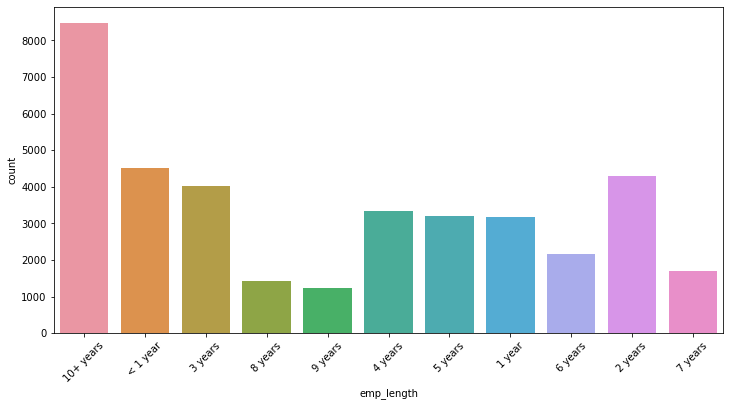

term


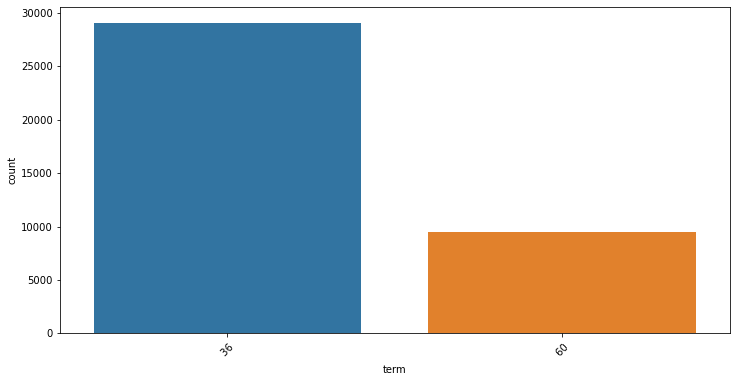

grade


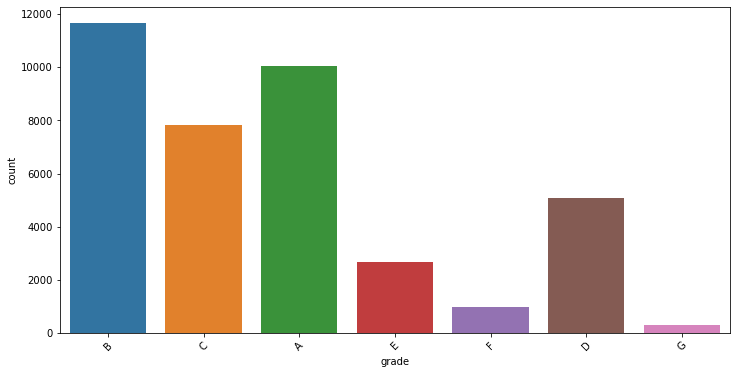

sub_grade


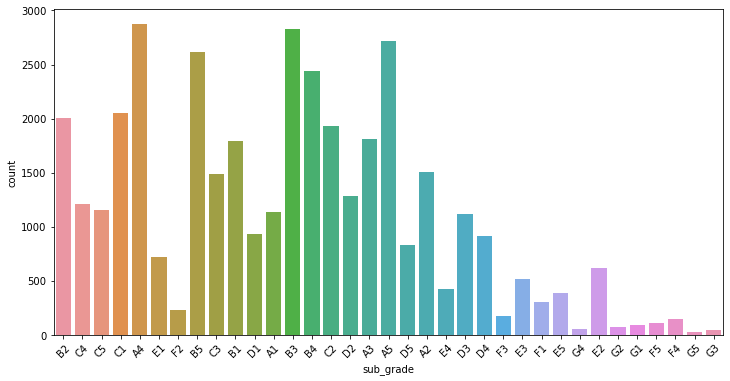

home_ownership


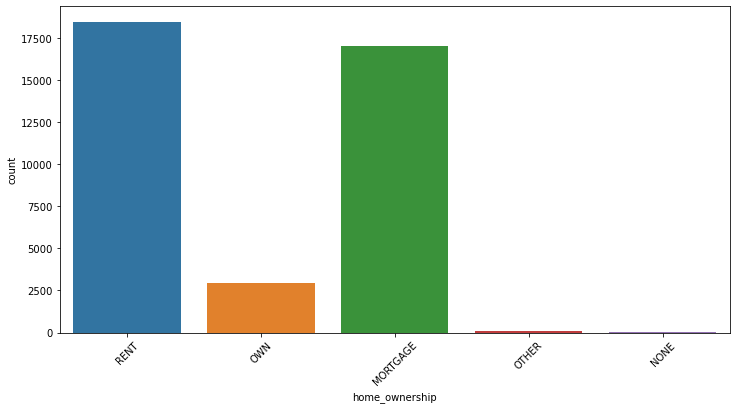

verification_status


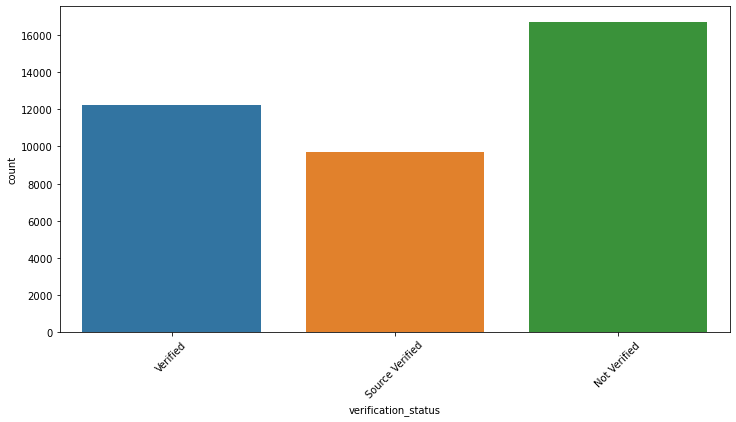

issue_d


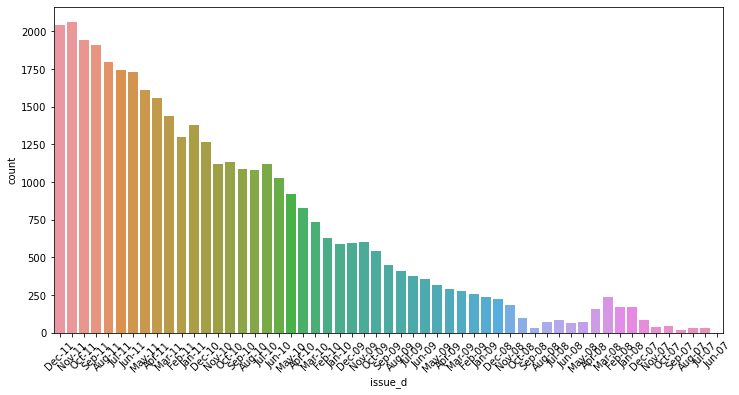

loan_status


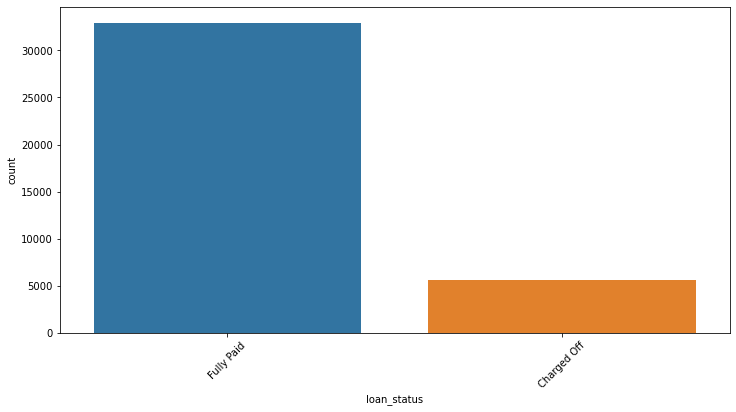

purpose


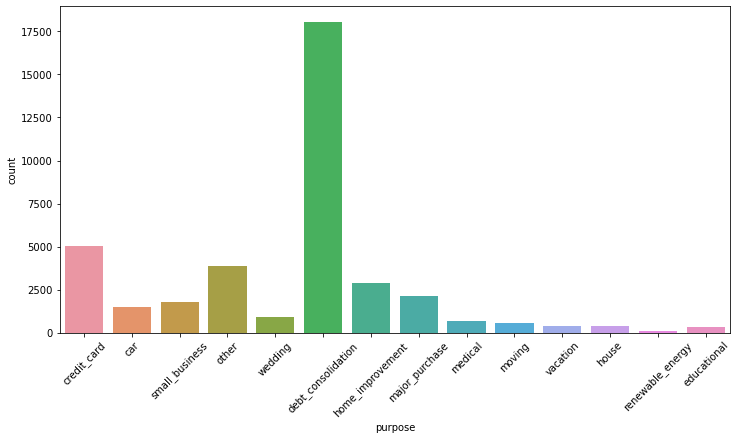

pub_rec_bankruptcies


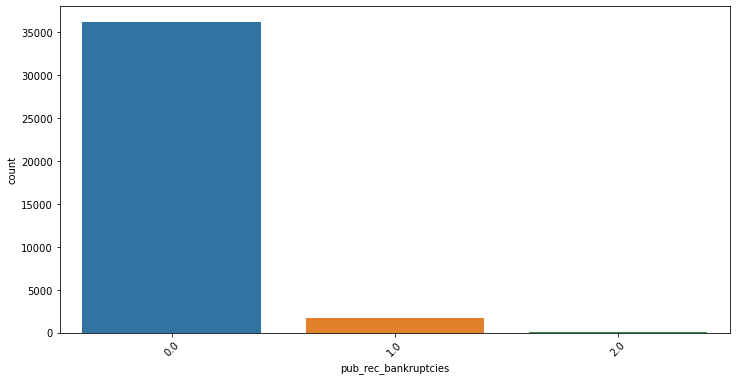

In [227]:
#Exploratory data analysis

# Univariate Analysis 
# Categorical variables - Countplot is used

for i in cat_variables:
    print (i)
    plt.figure(figsize = (12,6))
    sns.countplot(loan_data[i])
    plt.xticks(rotation = 45)
    plt.show()


<AxesSubplot:xlabel='int_rate', ylabel='Density'>

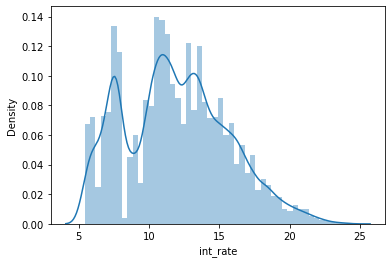

In [228]:
#Using distplot for interest rates
sns.distplot(loan_data['int_rate'])


### Univariate analysis : Continuous variables : Histplot

<AxesSubplot:xlabel='funded_amnt_inv', ylabel='Count'>

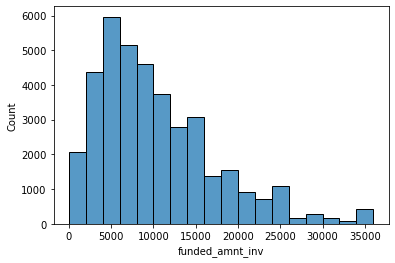

In [229]:
# Univariate Analysis - Continuous variable : Histplot is used
#Since the histograms of 'loan_amnt','funded_amnt','funded_amnt_inv' are similar , we can consider any one of these. 
#funded_amnt_inv has been used as this is the final amount given to the borrower
#histogram for funded_amnt_inv
sns.histplot(loan_data['funded_amnt_inv'], bins = [0,2000,4000,6000,8000,10000,12000,14000,16000,18000,20000,22000,24000,26000,28000,30000,32000,34000,36000])


<AxesSubplot:xlabel='installment', ylabel='Count'>

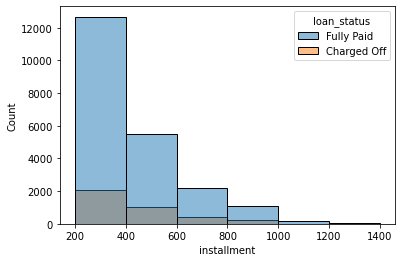

In [230]:
#histogram for installment wrt loan_status
sns.histplot(x=loan_data['installment'],bins=[200,400,600,800,1000,1200,1400],hue=loan_data['loan_status'])

<AxesSubplot:xlabel='funded_amnt_inv', ylabel='Count'>

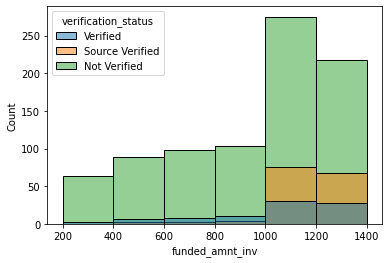

In [231]:
#histogram for installment wrt verification_status
sns.histplot(x=loan_data['funded_amnt_inv'],bins=[200,400,600,800,1000,1200,1400],hue=loan_data['verification_status'])

<AxesSubplot:xlabel='annual_inc', ylabel='Count'>

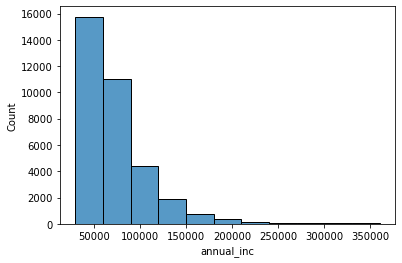

In [232]:
#Histogram for annual_inc
sns.histplot(loan_data['annual_inc'], bins = [30000,60000,90000,120000,150000,180000,210000,240000,270000,300000,330000,360000])


<AxesSubplot:xlabel='dti', ylabel='Count'>

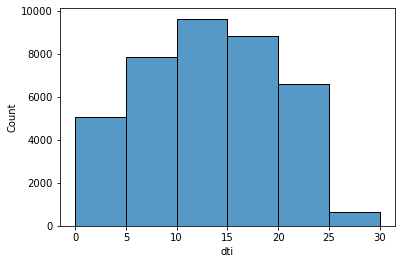

In [233]:
#Histogram for dti
sns.histplot(loan_data['dti'],bins = [0,5,10,15,20,25,30])

<AxesSubplot:xlabel='mths_since_last_delinq', ylabel='Count'>

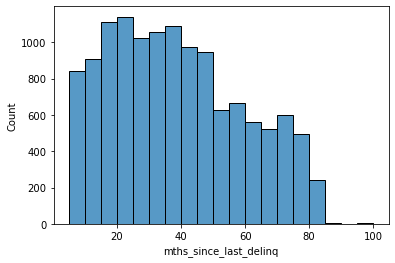

In [234]:
#Histogram for mths_since_last_delinq
sns.histplot(loan_data['mths_since_last_delinq'],bins=[5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100])


# Outlier detection

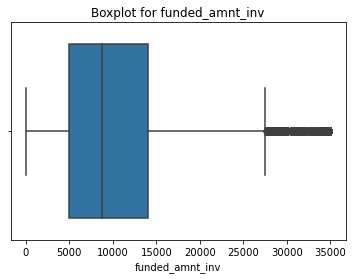

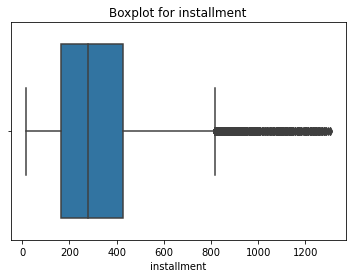

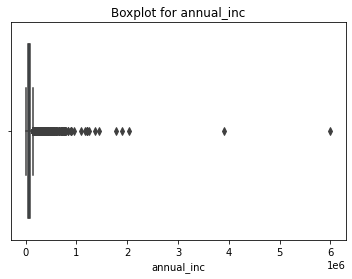

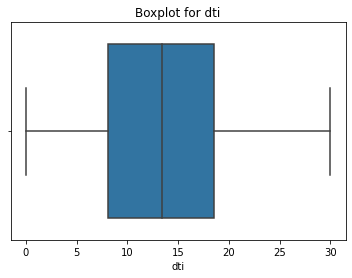

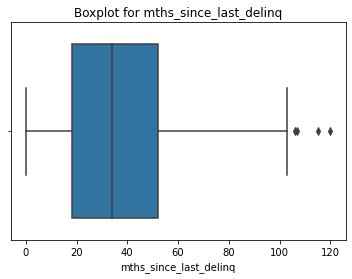

In [235]:
#Outlier detection
#We can see outliers , but we will not do data imputation here
for i in cont_variables: 
    sns.boxplot(loan_data[i])
    plt.title("Boxplot for "+i)
    plt.show()

# Bivariate Analysis

### Bivariate analysis - Continuous variables : HeatMap

<AxesSubplot:>

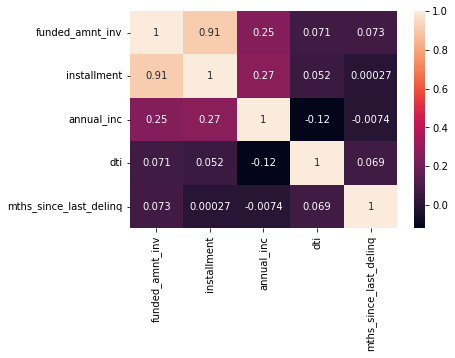

In [236]:
#Bivariate analysis
#Heatmap on continuous variables
sns.heatmap(loan_data[cont_variables].corr(),annot=True)

### Bivariate analysis - Categorical variables : Barplot 

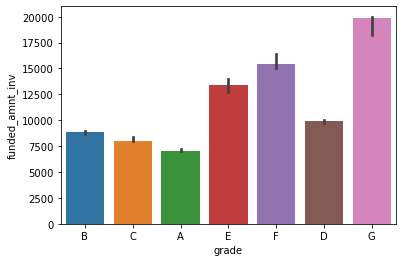

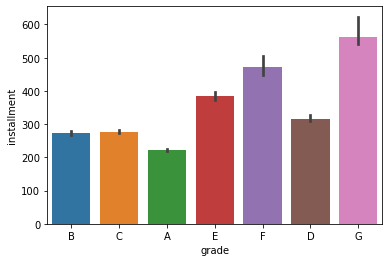

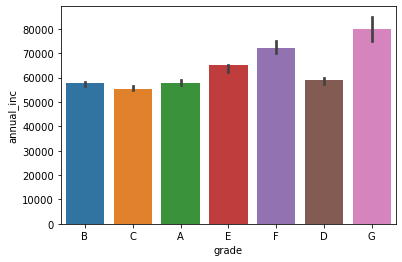

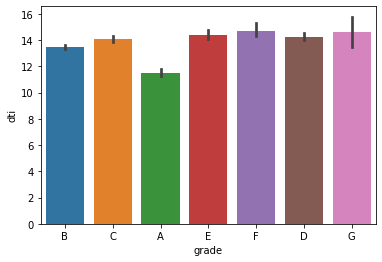

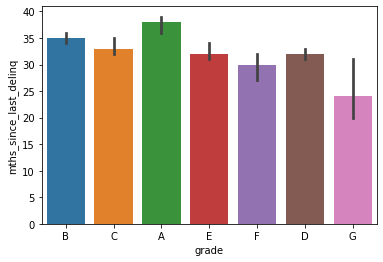

In [237]:
cont_variables=['funded_amnt_inv','installment','annual_inc','dti','mths_since_last_delinq']
cat_variables=['term','grade','sub_grade','home_ownership','verification_status','issue_d','loan_status','purpose','pub_rec_bankruptcies']
other_variables =['desc','addr_state','collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens','title','emp_title']

#Barplot for Bivariate analysis
#Grade vs cont_variables

for i in cont_variables:
    sns.barplot(x=loan_data['grade'],y=loan_data[i],estimator=np.median)
    plt.show()
       


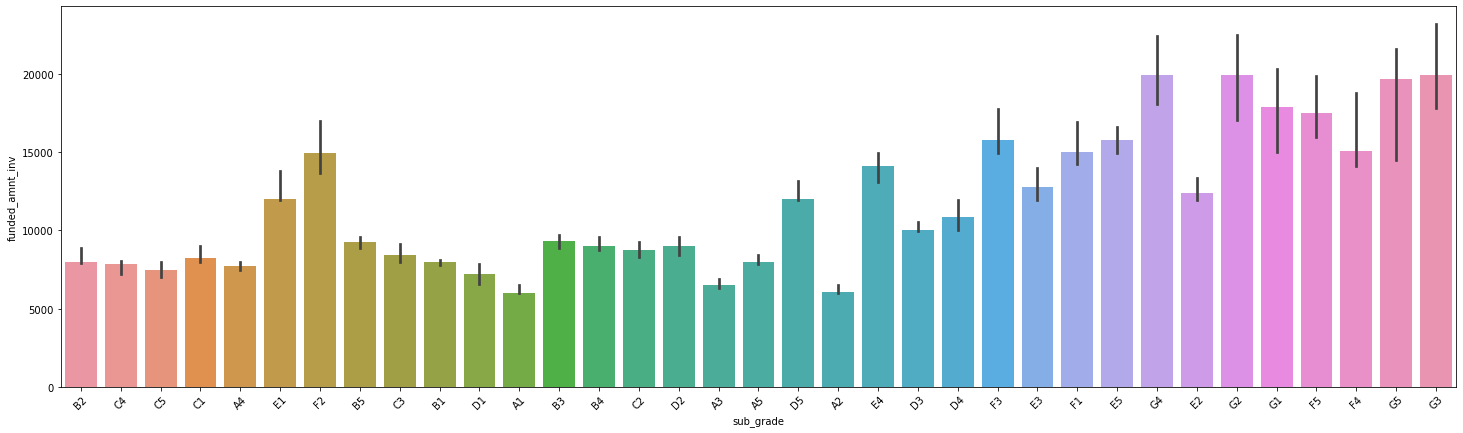

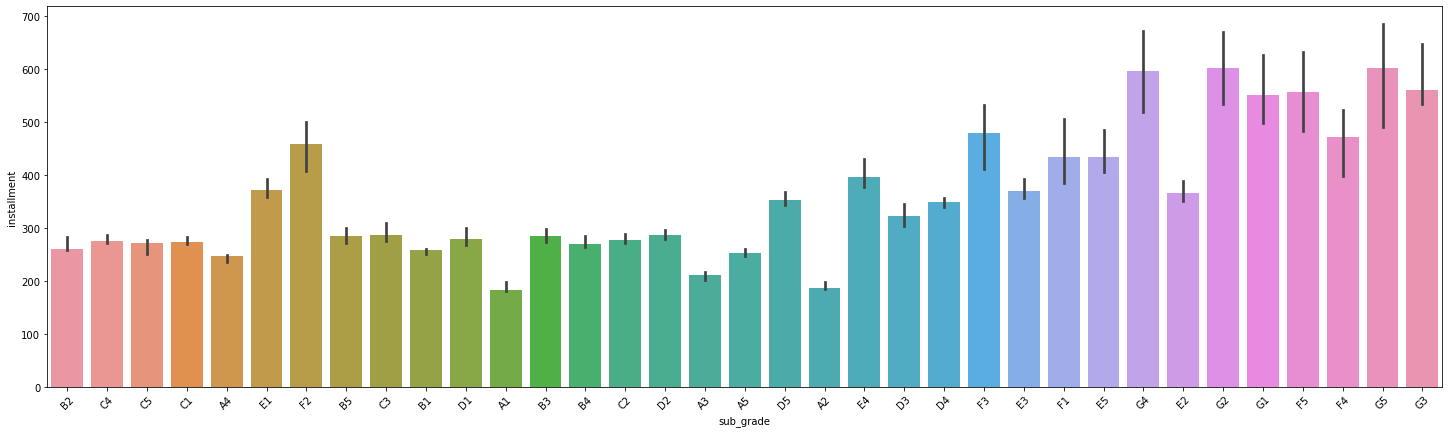

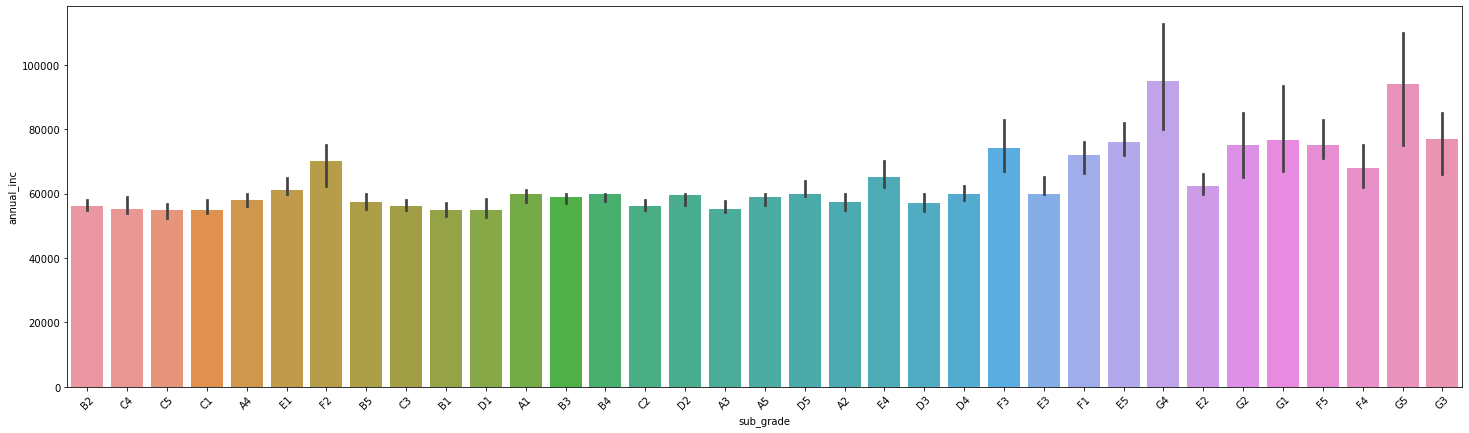

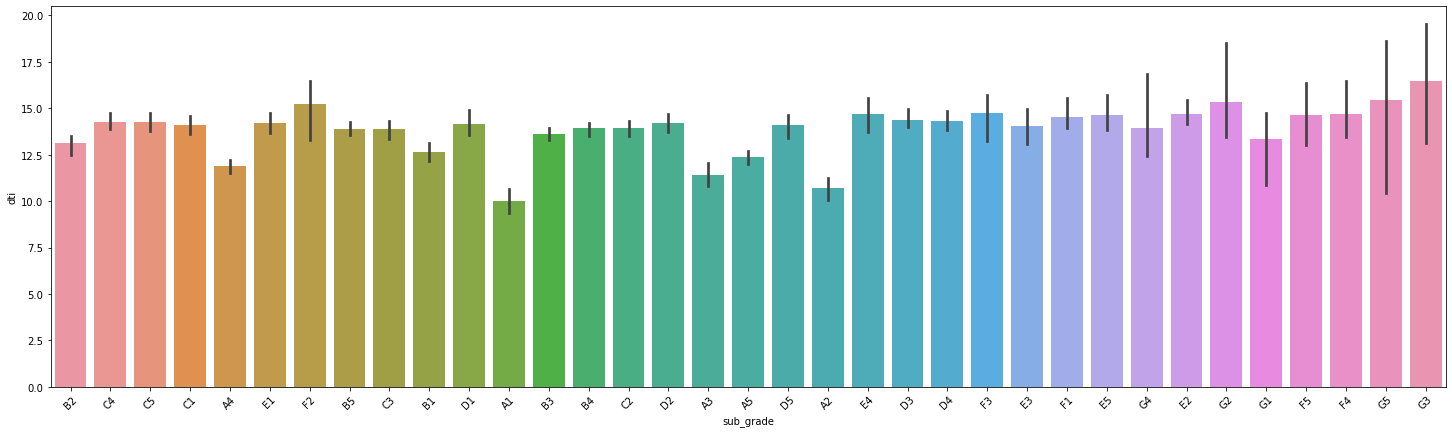

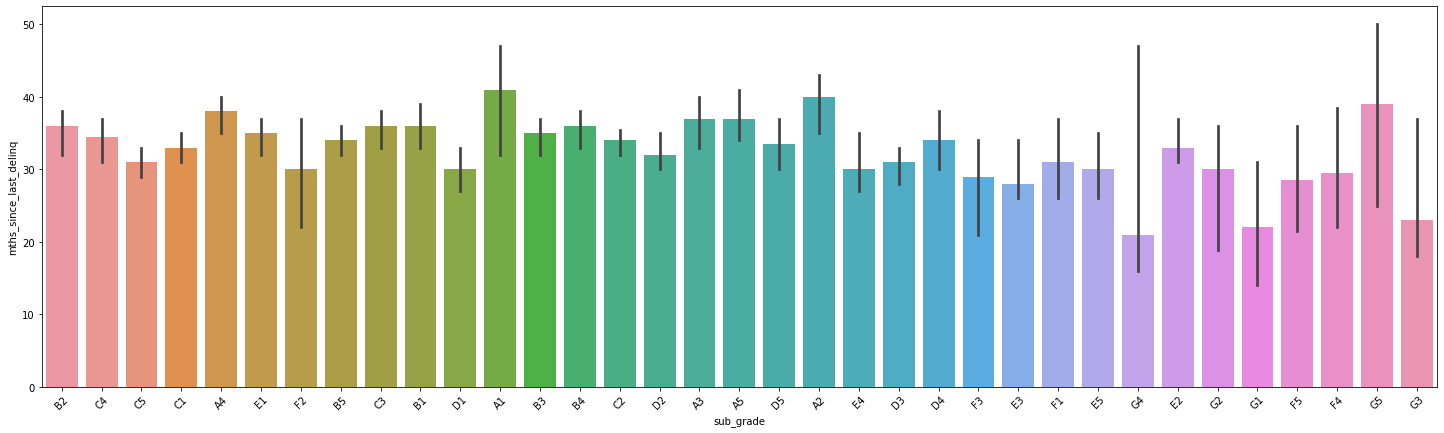

In [238]:
#Barplot
#Sub-grade vs continuous variable

for i in cont_variables:
    plt.figure(figsize = (25,7))
    sns.barplot(x=loan_data['sub_grade'],y=loan_data[i],estimator=np.median)
    plt.xticks(rotation = 45)
    plt.show()
    
    

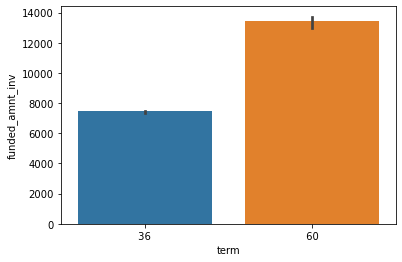

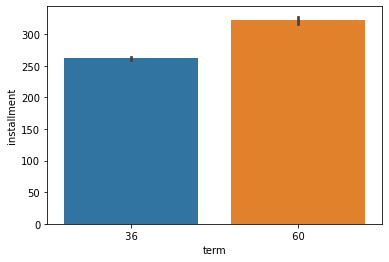

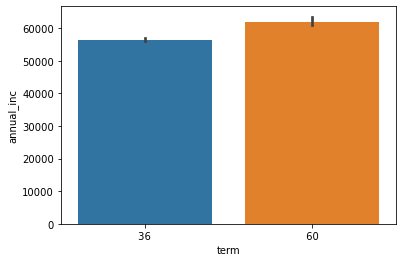

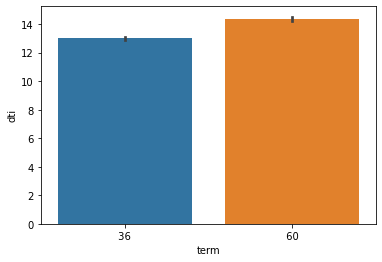

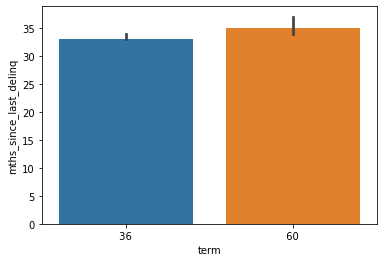

In [239]:
#Barplot
#Term vs continuous variable

for i in cont_variables:
    sns.barplot(x=loan_data['term'],y=loan_data[i],estimator=np.median)
    plt.show()

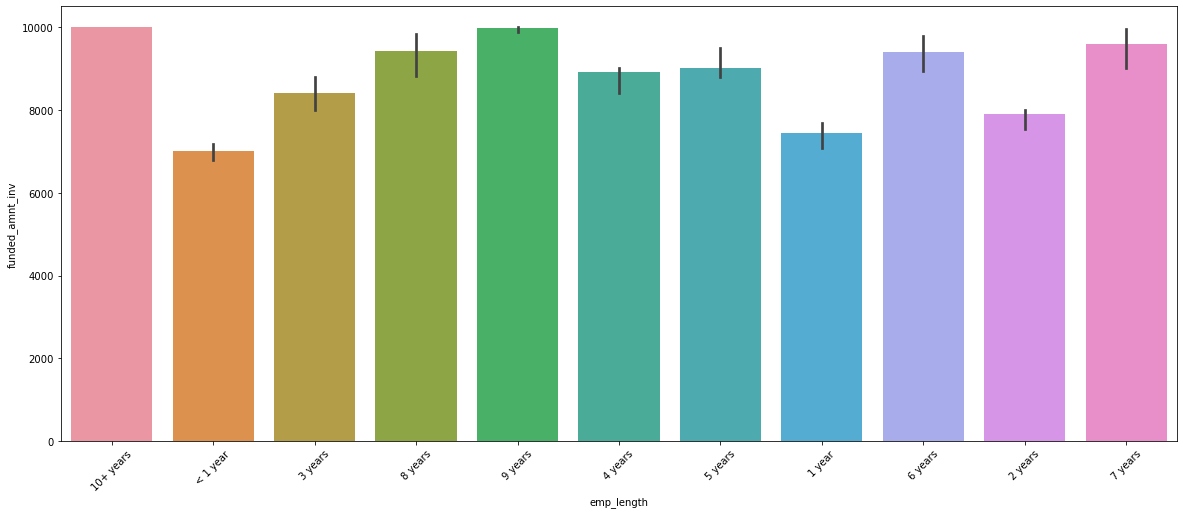

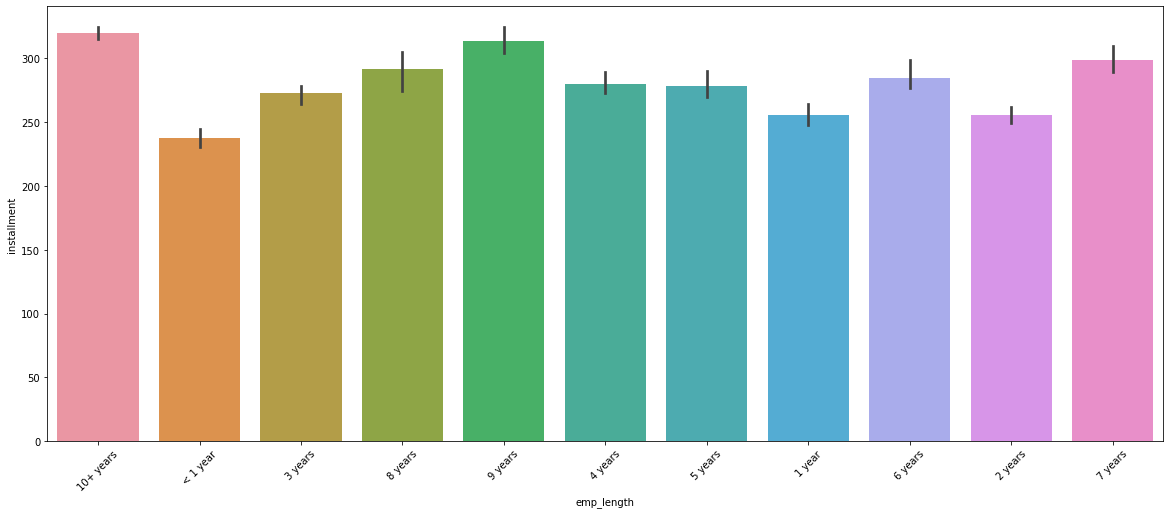

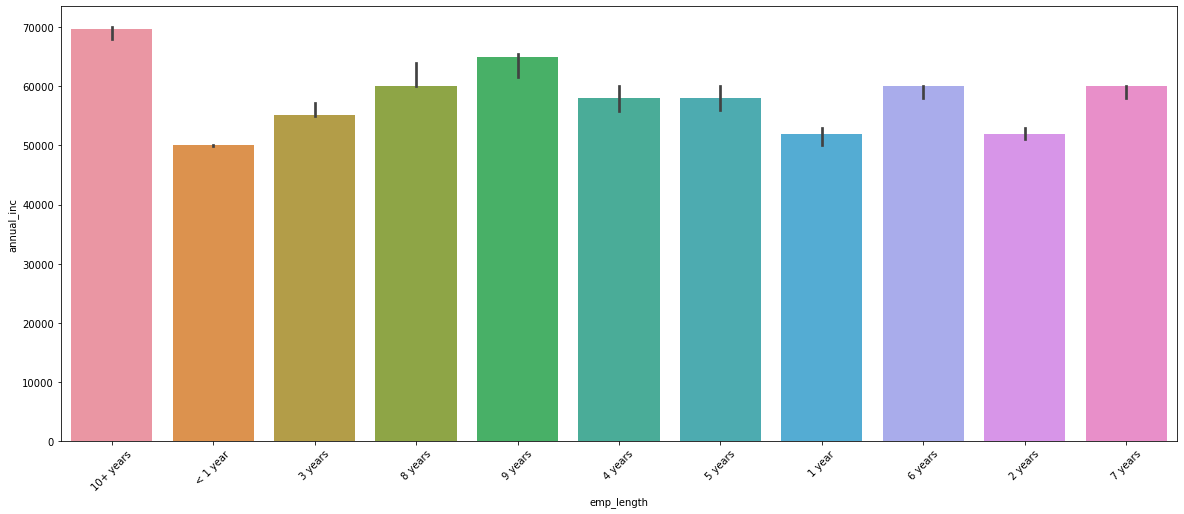

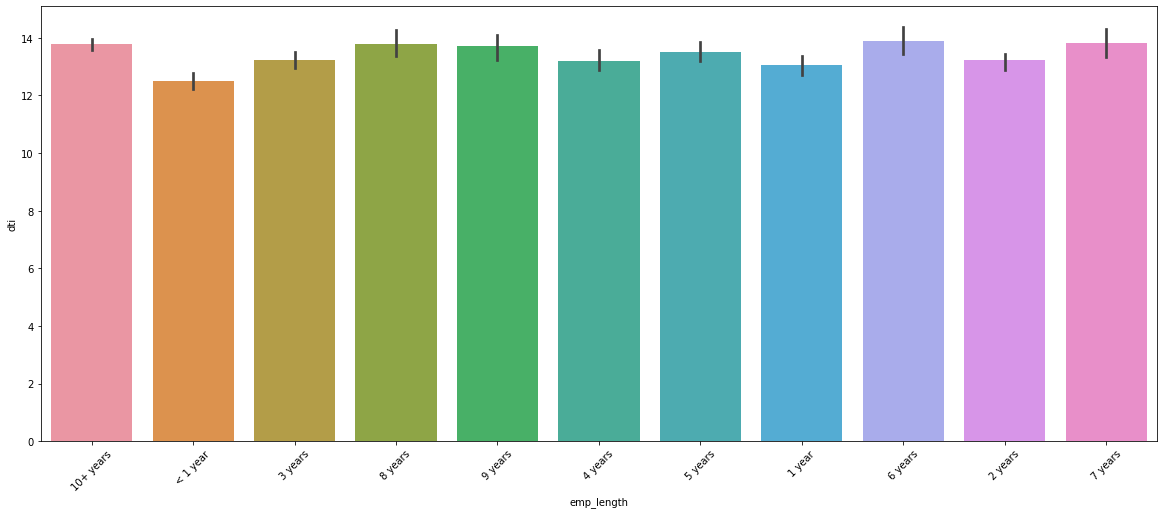

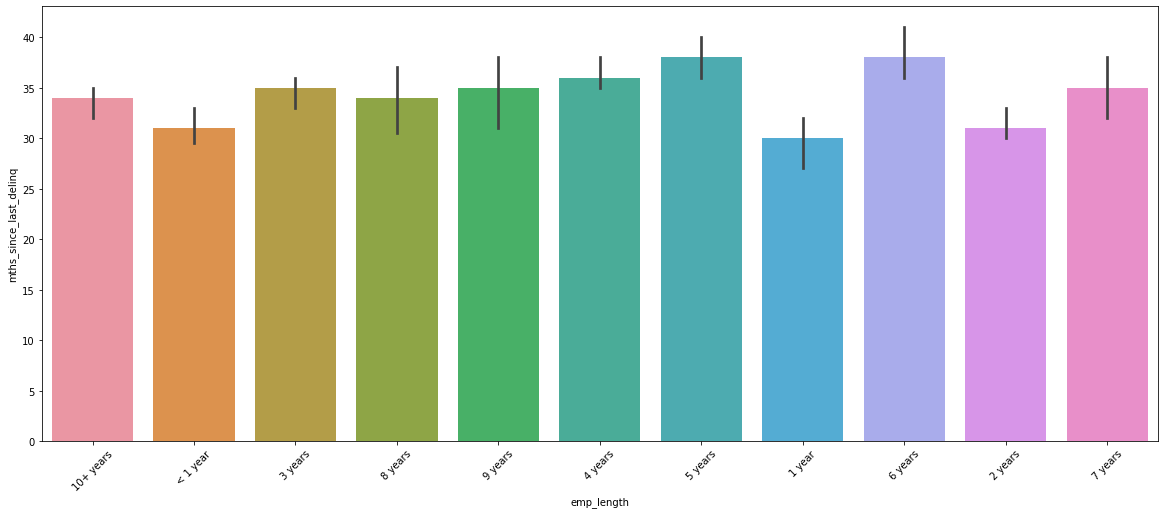

In [240]:
#Barplot
#emp_length vs all continuous variables
for i in cont_variables:
    plt.figure(figsize = (20,8))
    sns.barplot(x=loan_data['emp_length'],y=loan_data[i],estimator=np.median)
    plt.xticks(rotation = 45)
    plt.show()

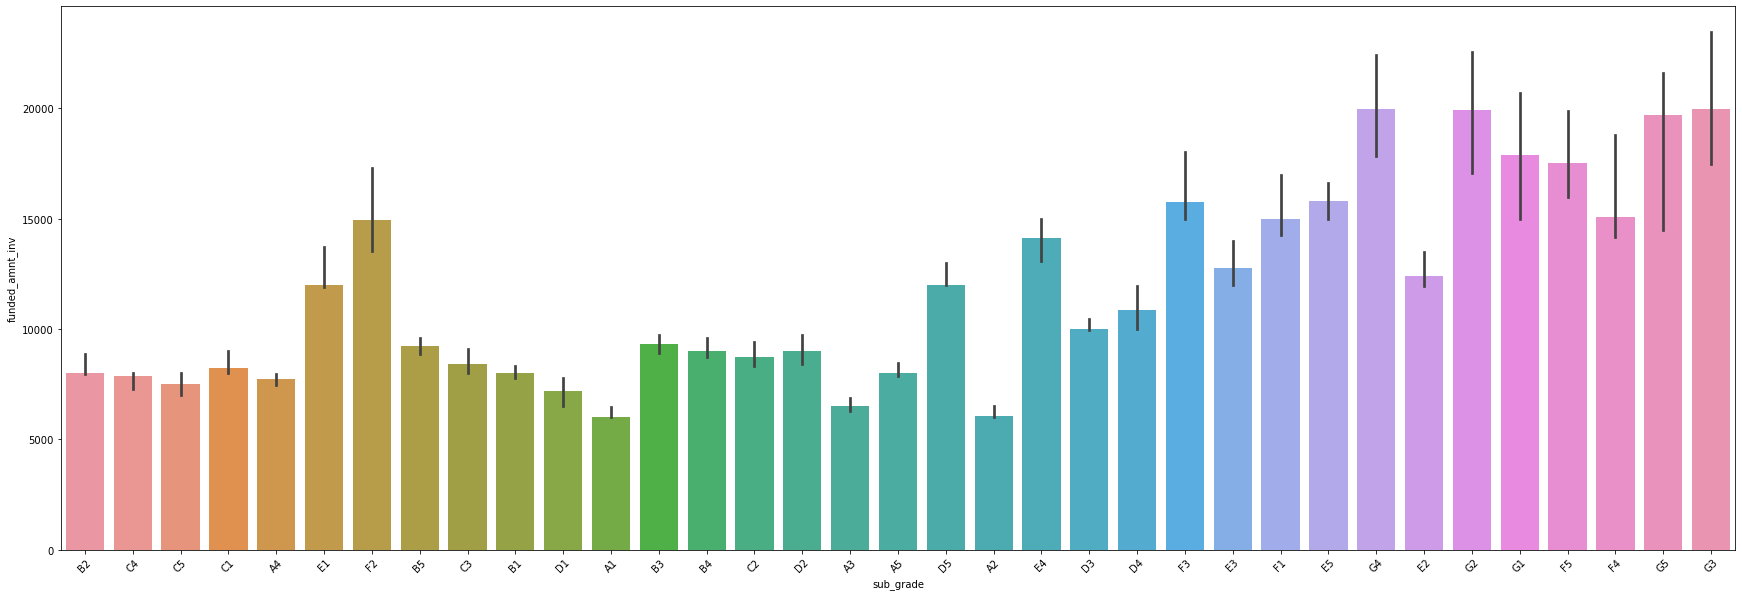

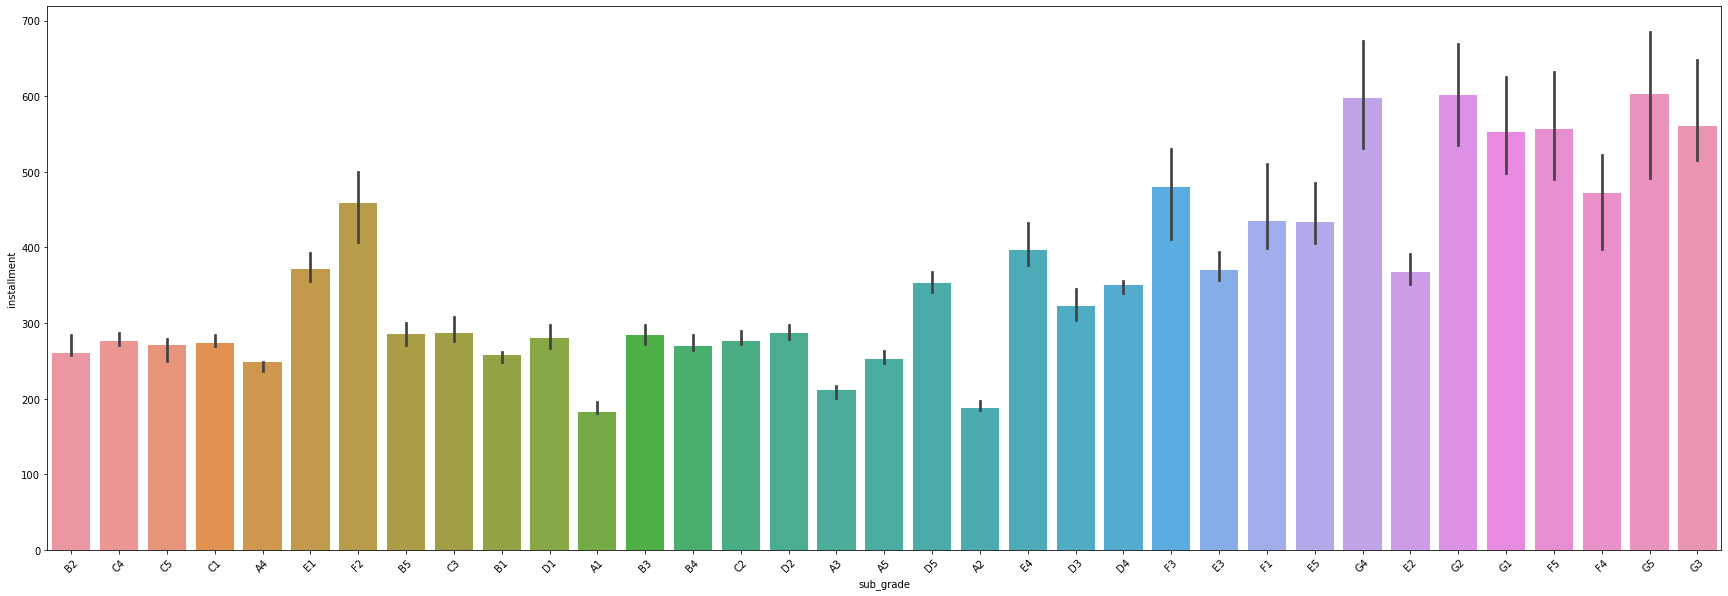

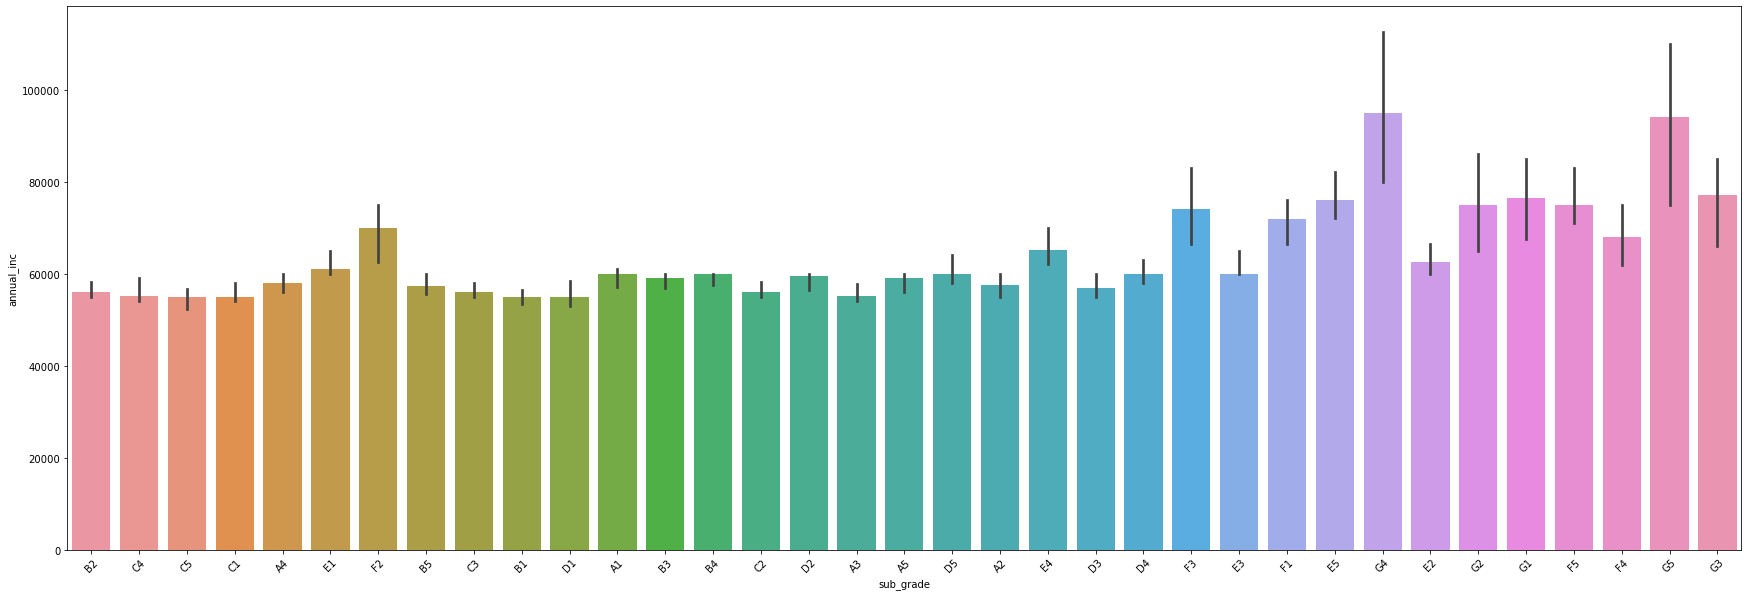

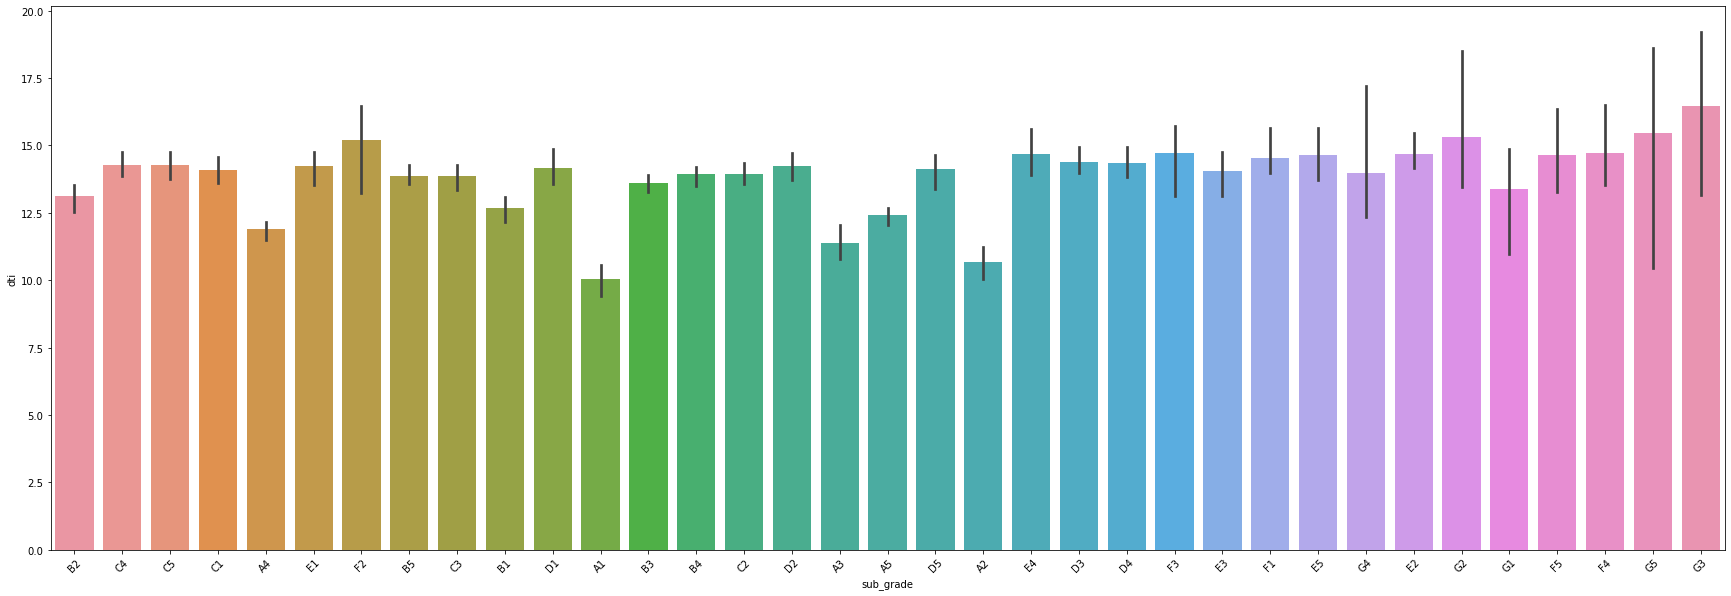

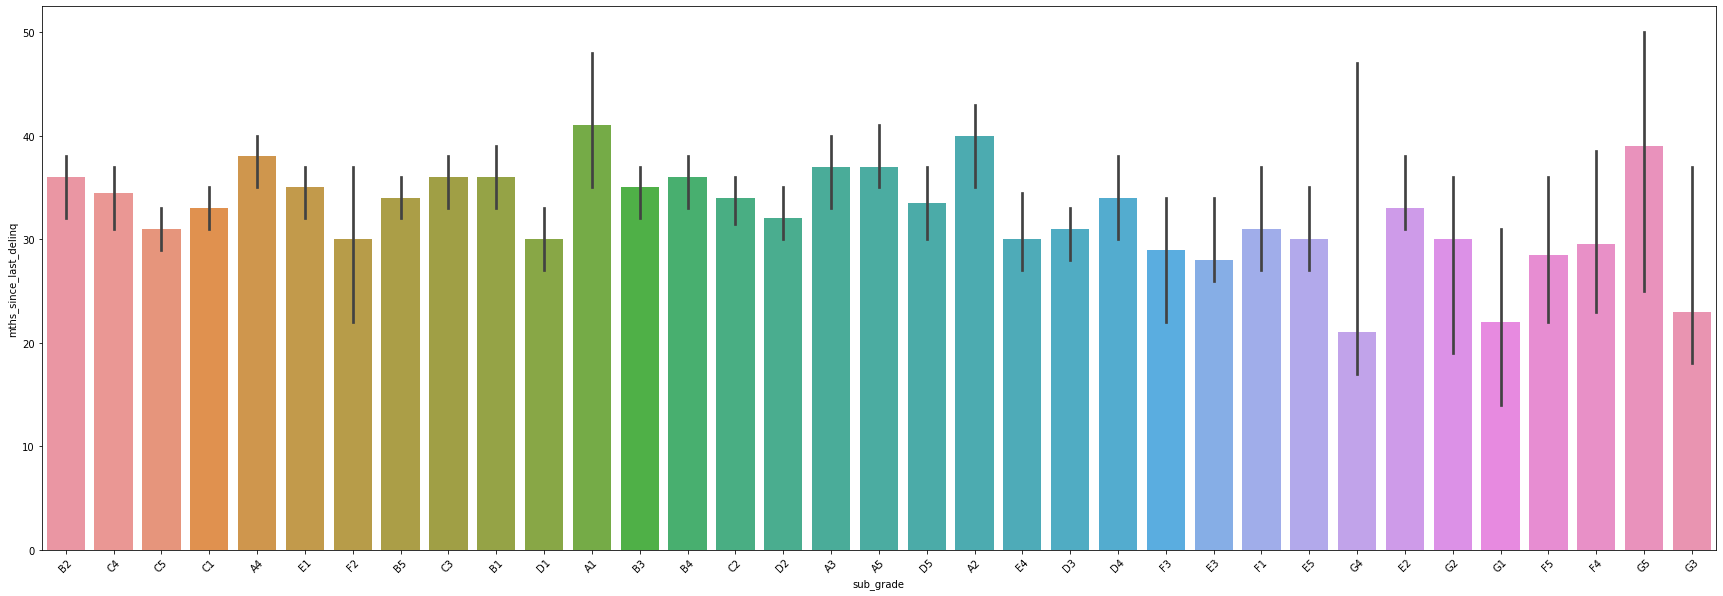

In [241]:
#Barplot
#sub_grade vs all continuous variables
for i in cont_variables:
    plt.figure(figsize = (30,10))
    sns.barplot(x=loan_data['sub_grade'],y=loan_data[i],estimator=np.median)
    plt.xticks(rotation = 45)
    plt.show()

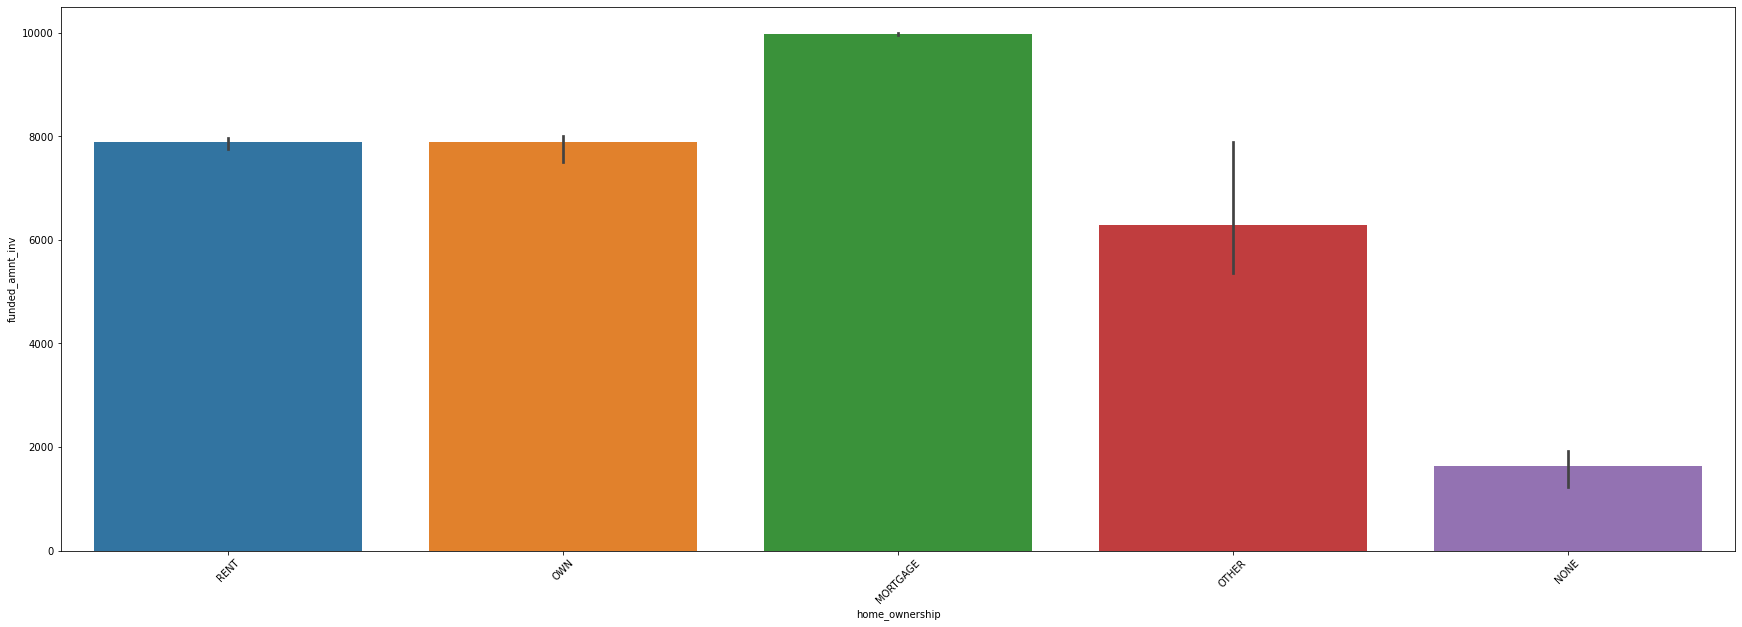

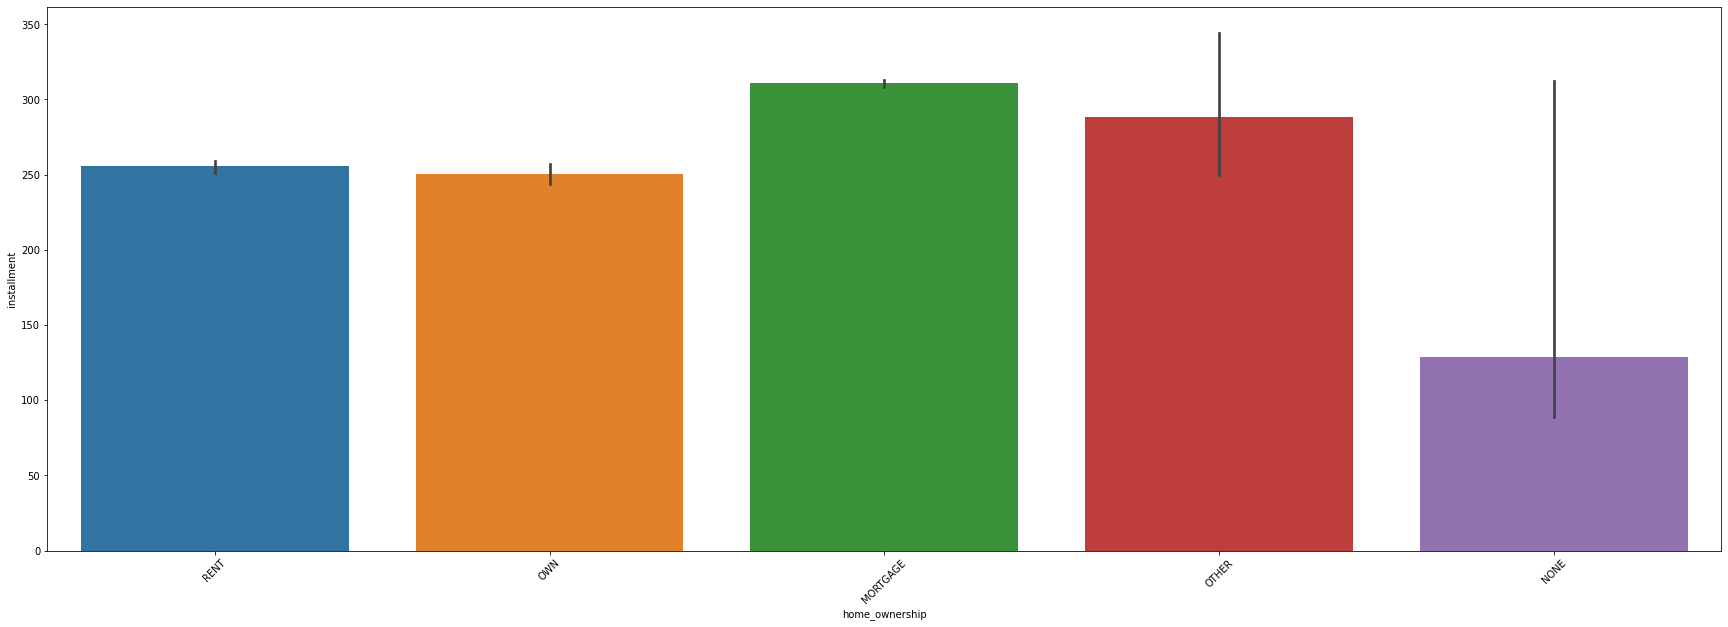

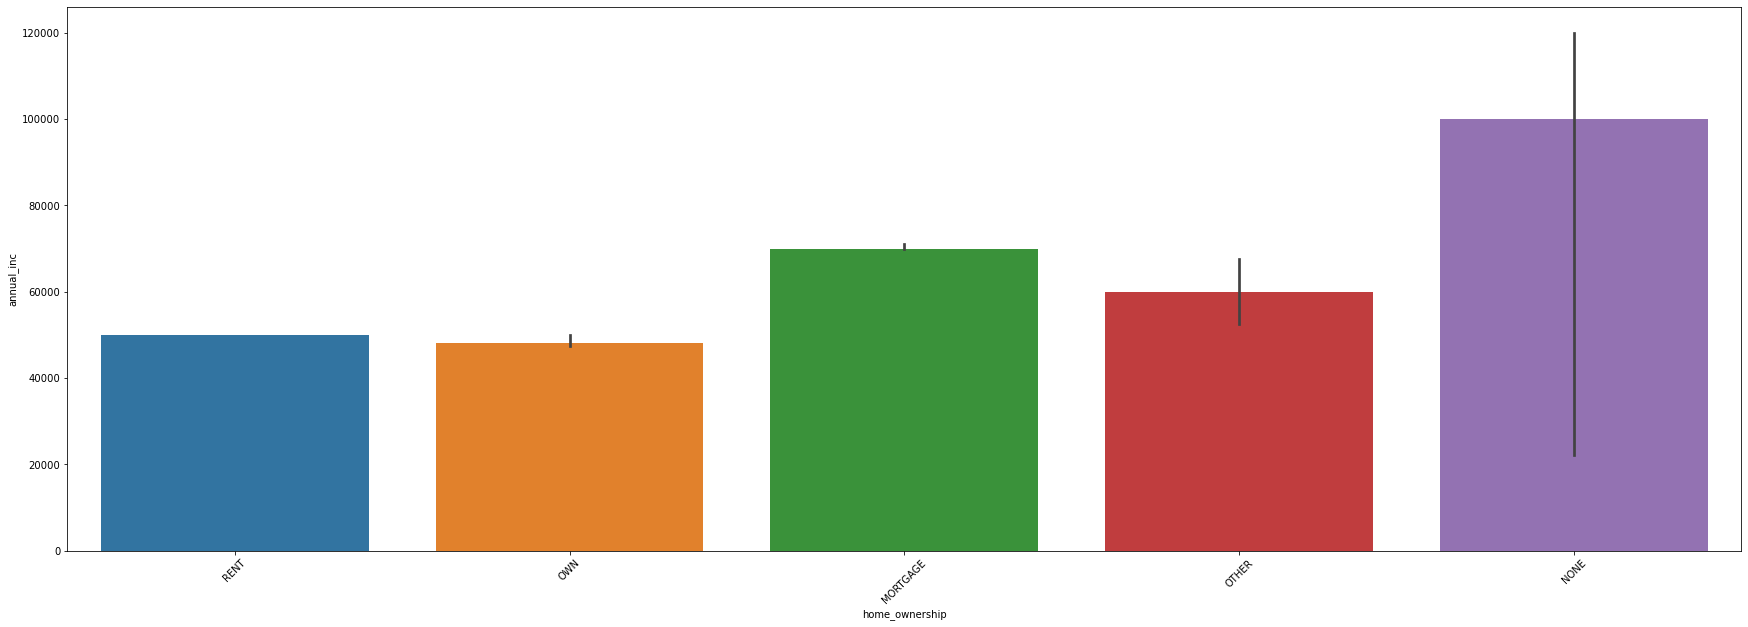

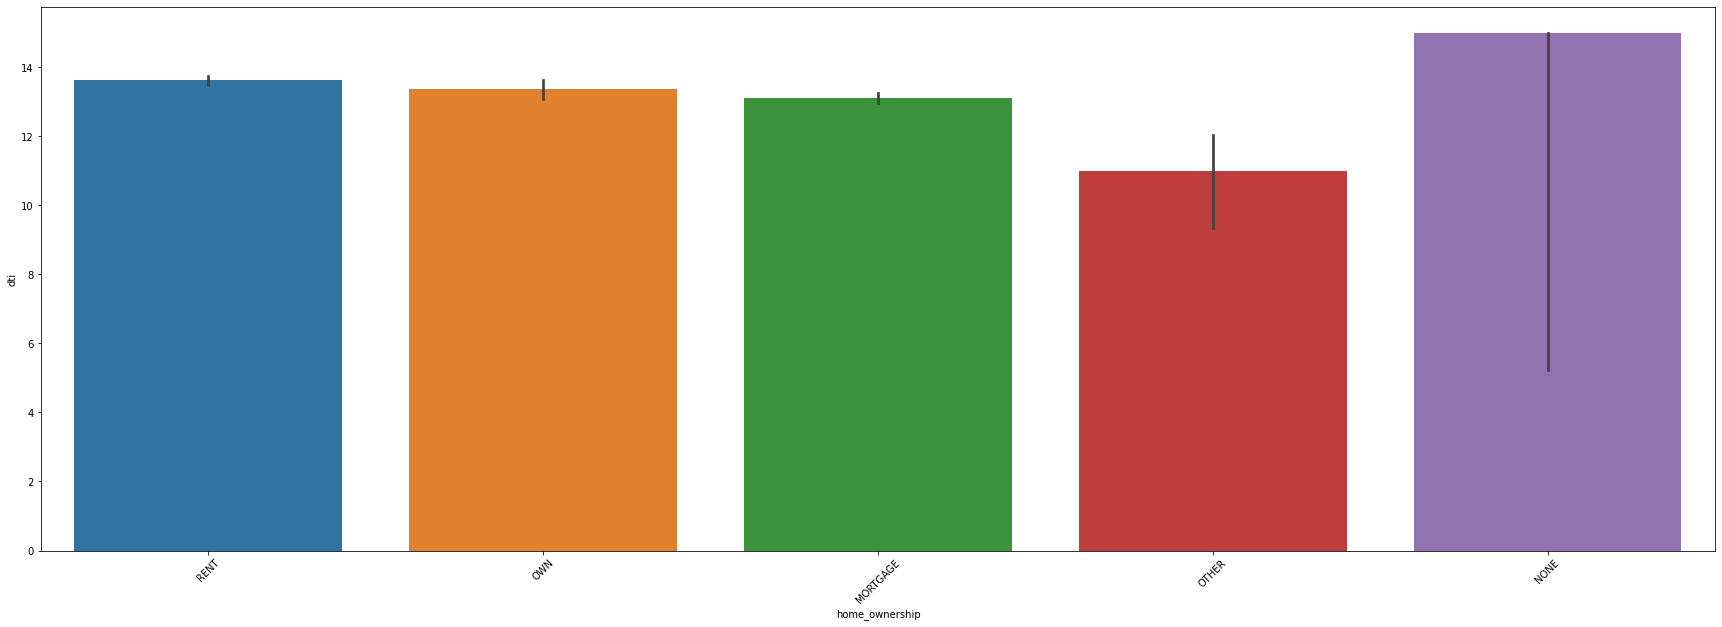

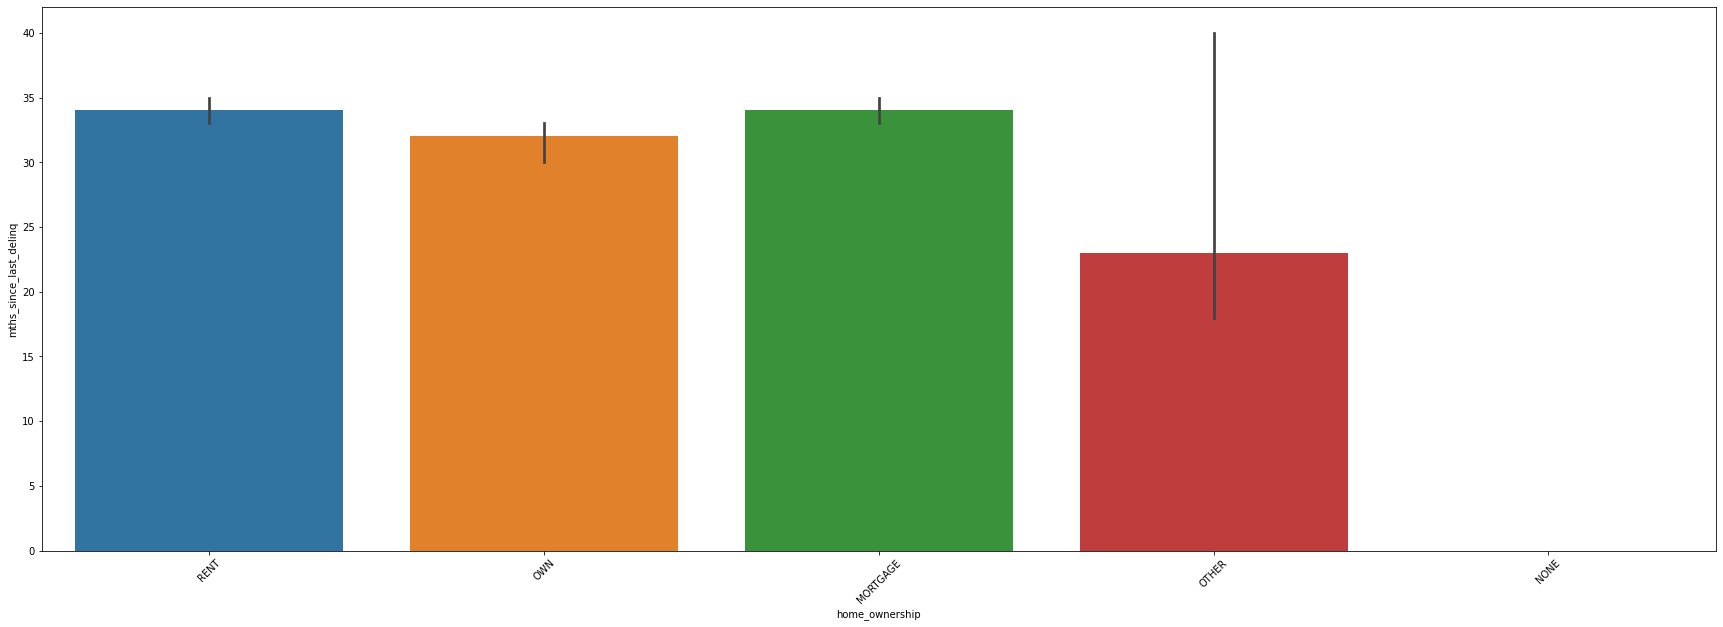

In [242]:
#Barplot
#home_ownership vs continuous variables
for i in cont_variables:
    plt.figure(figsize = (30,10))
    sns.barplot(x=loan_data['home_ownership'],y=loan_data[i],estimator=np.median)
    plt.xticks(rotation = 45)
    plt.show()

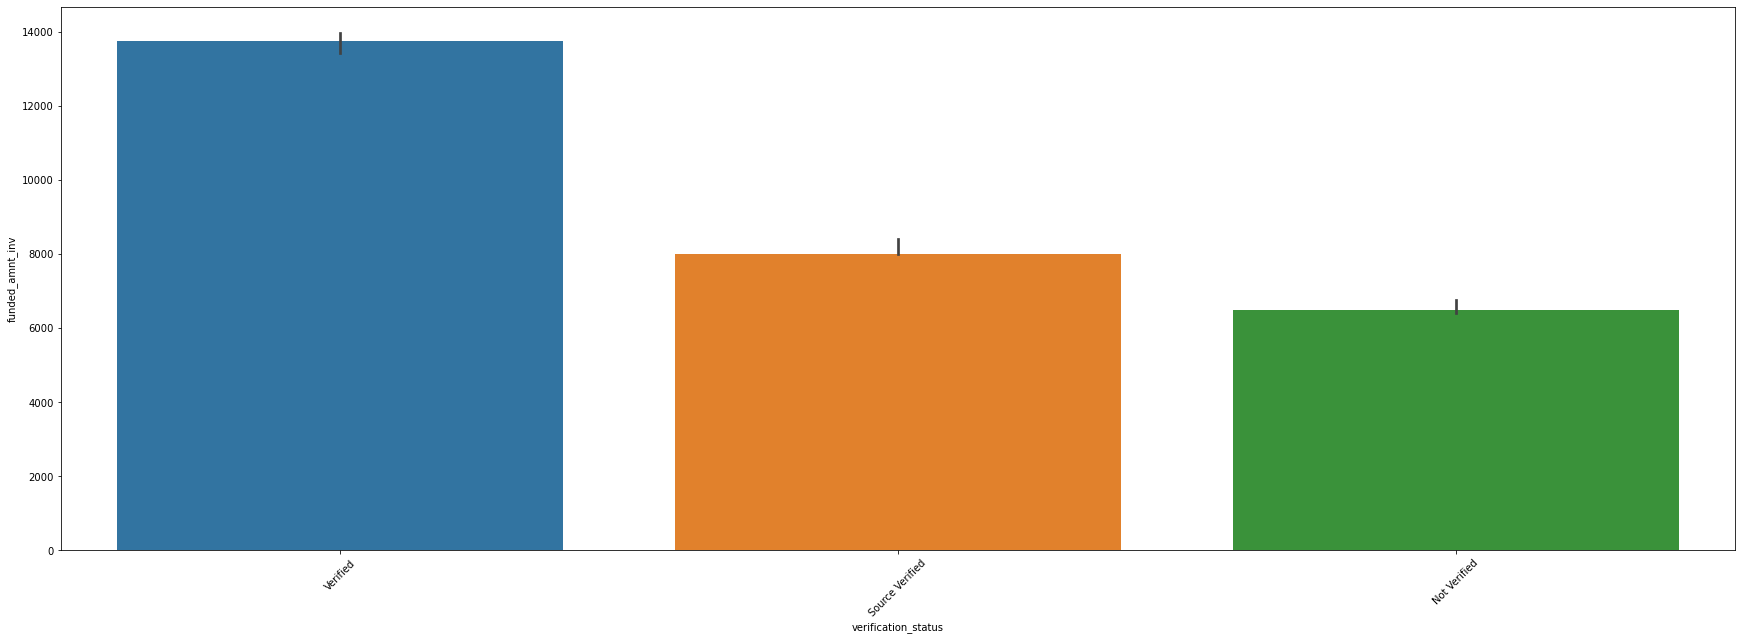

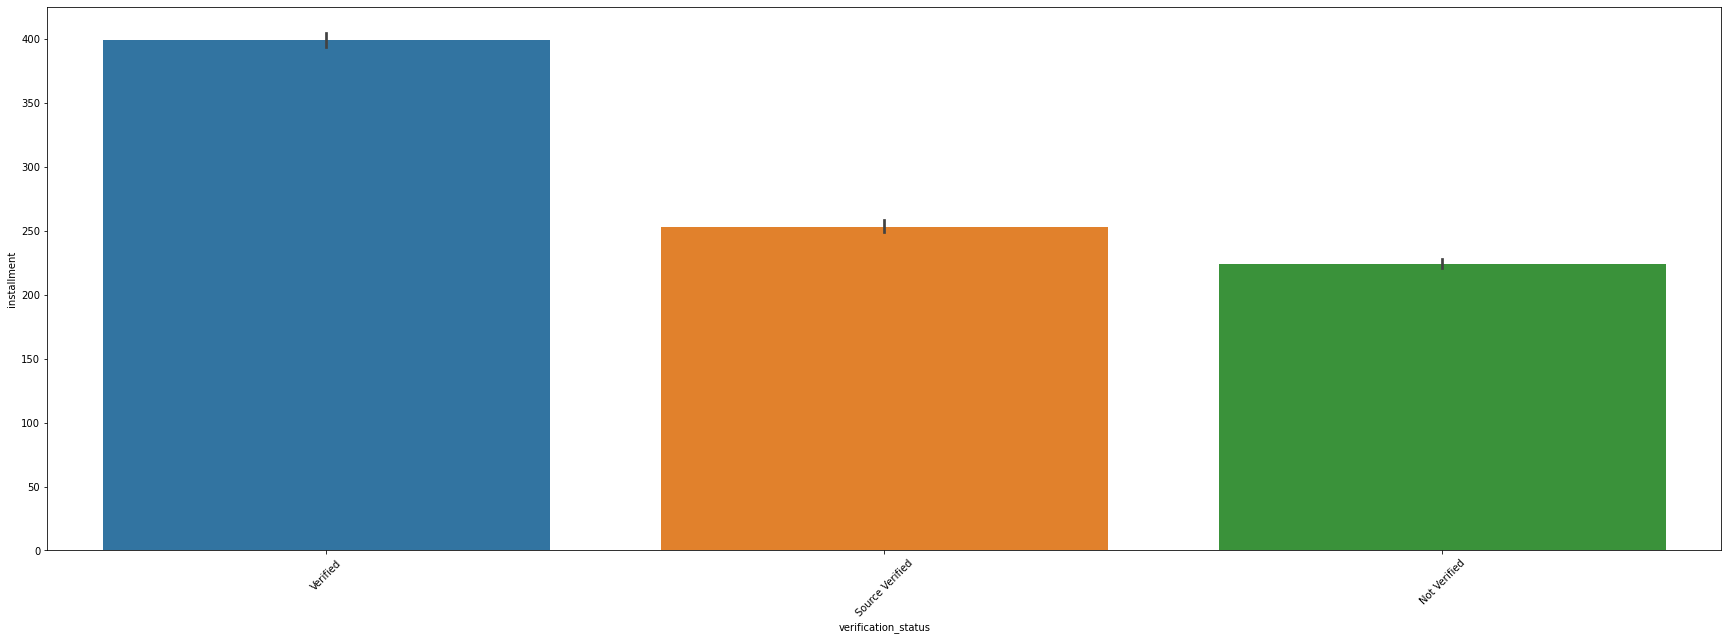

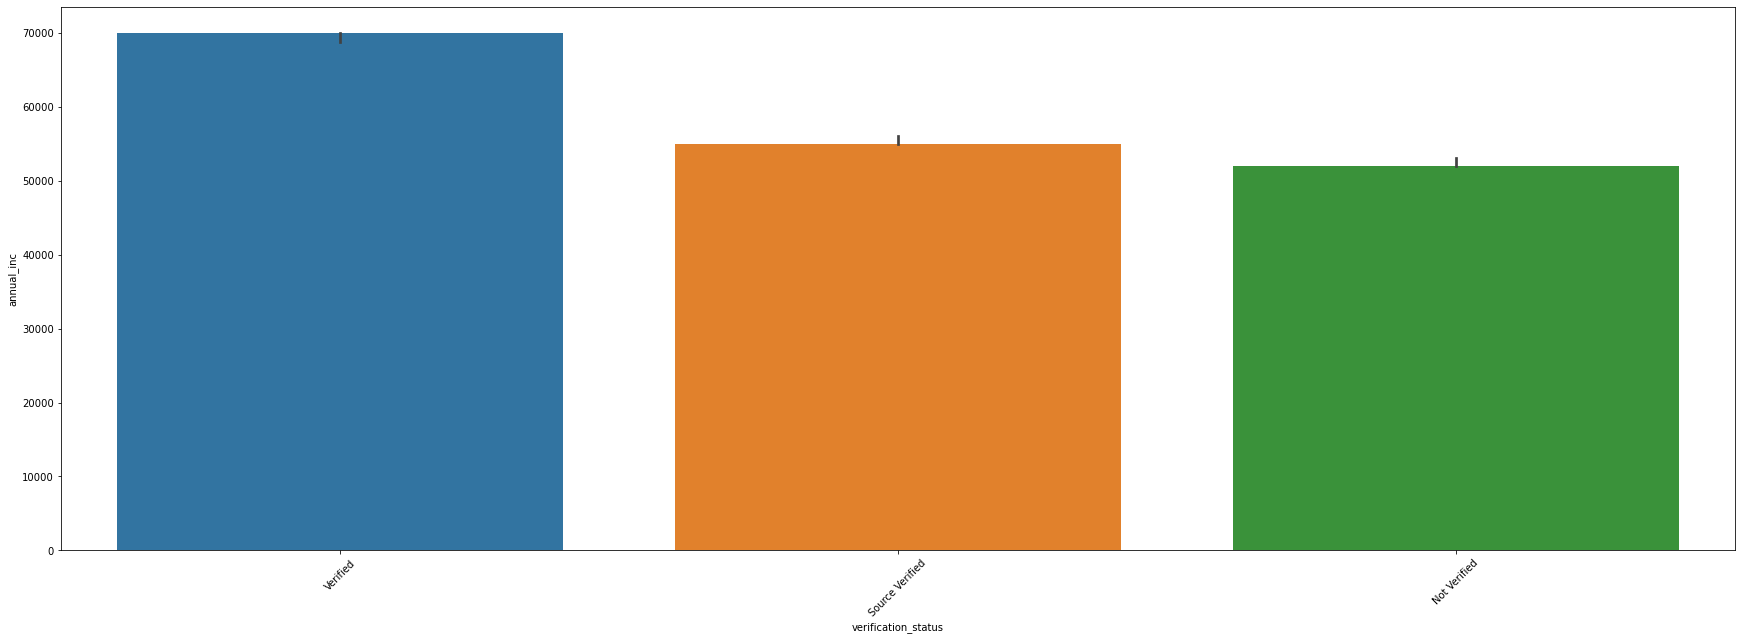

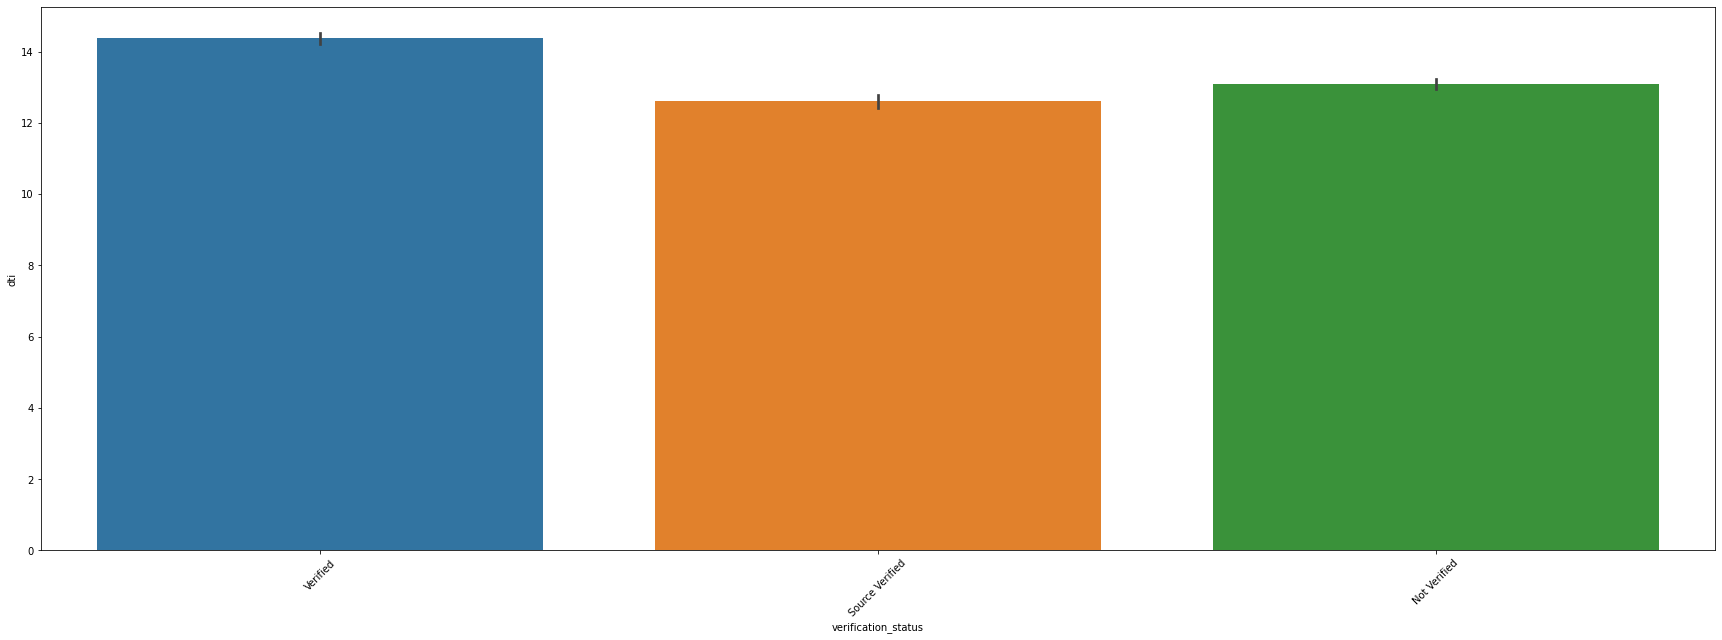

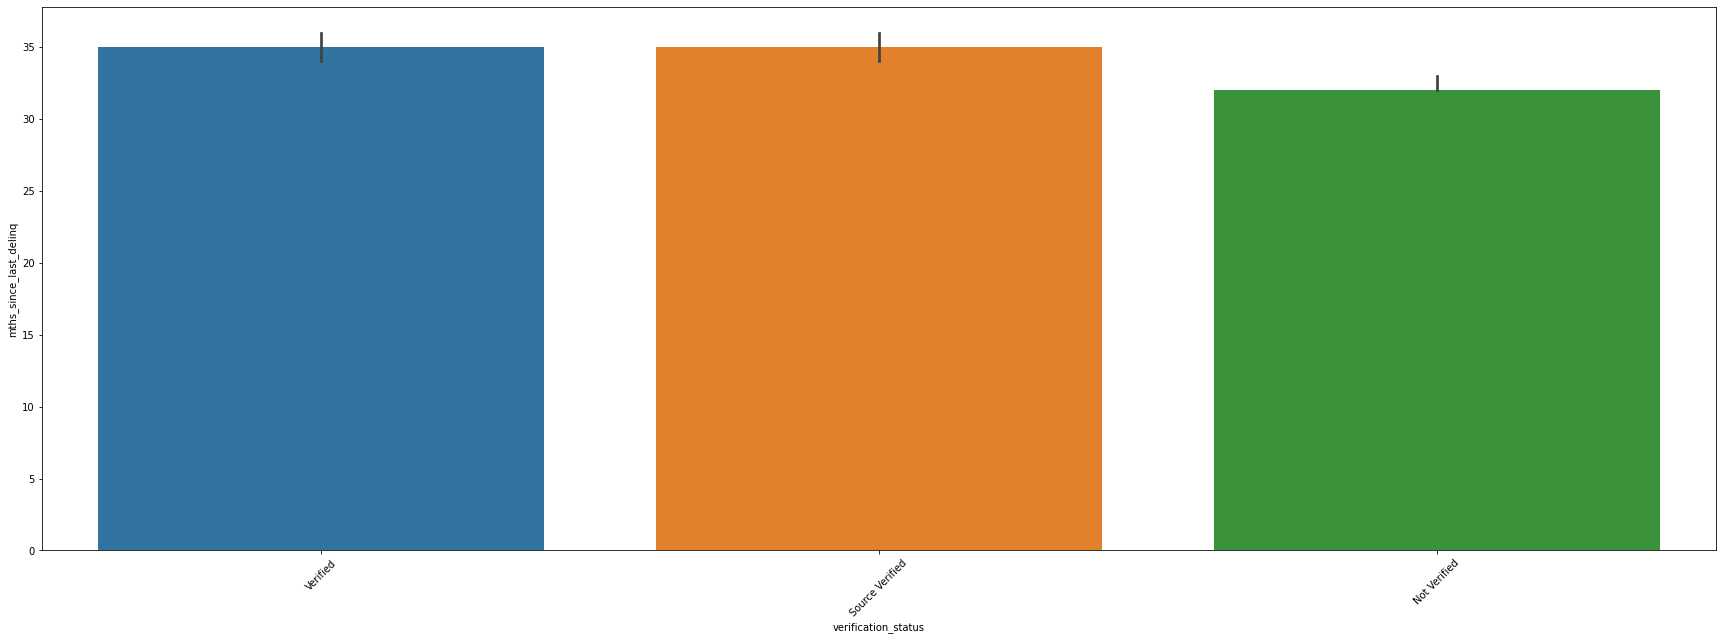

In [243]:
#Barplot
#verification_status vs continuous variables
for i in cont_variables:
    plt.figure(figsize = (30,10))
    sns.barplot(x=loan_data['verification_status'],y=loan_data[i],estimator=np.median)
    plt.xticks(rotation = 45)
    plt.show()

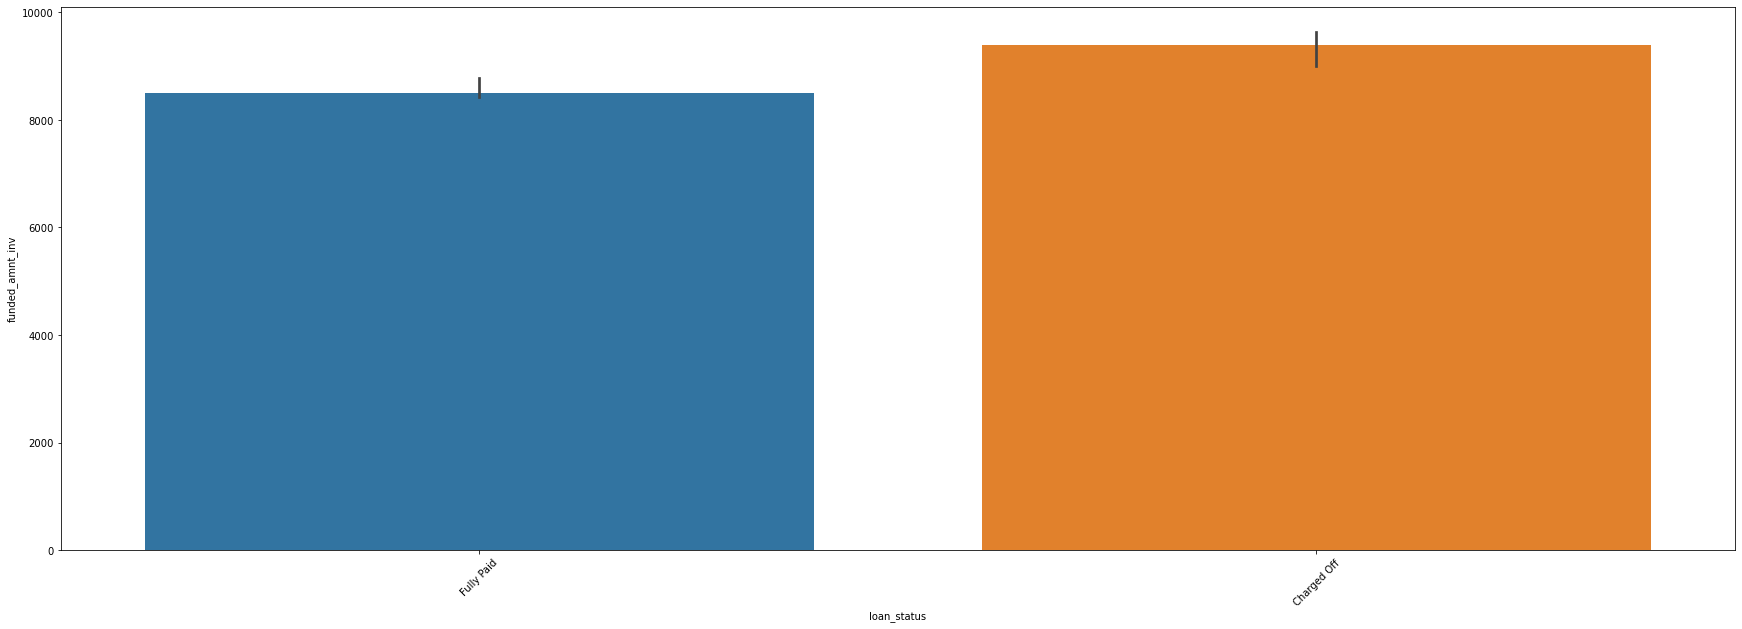

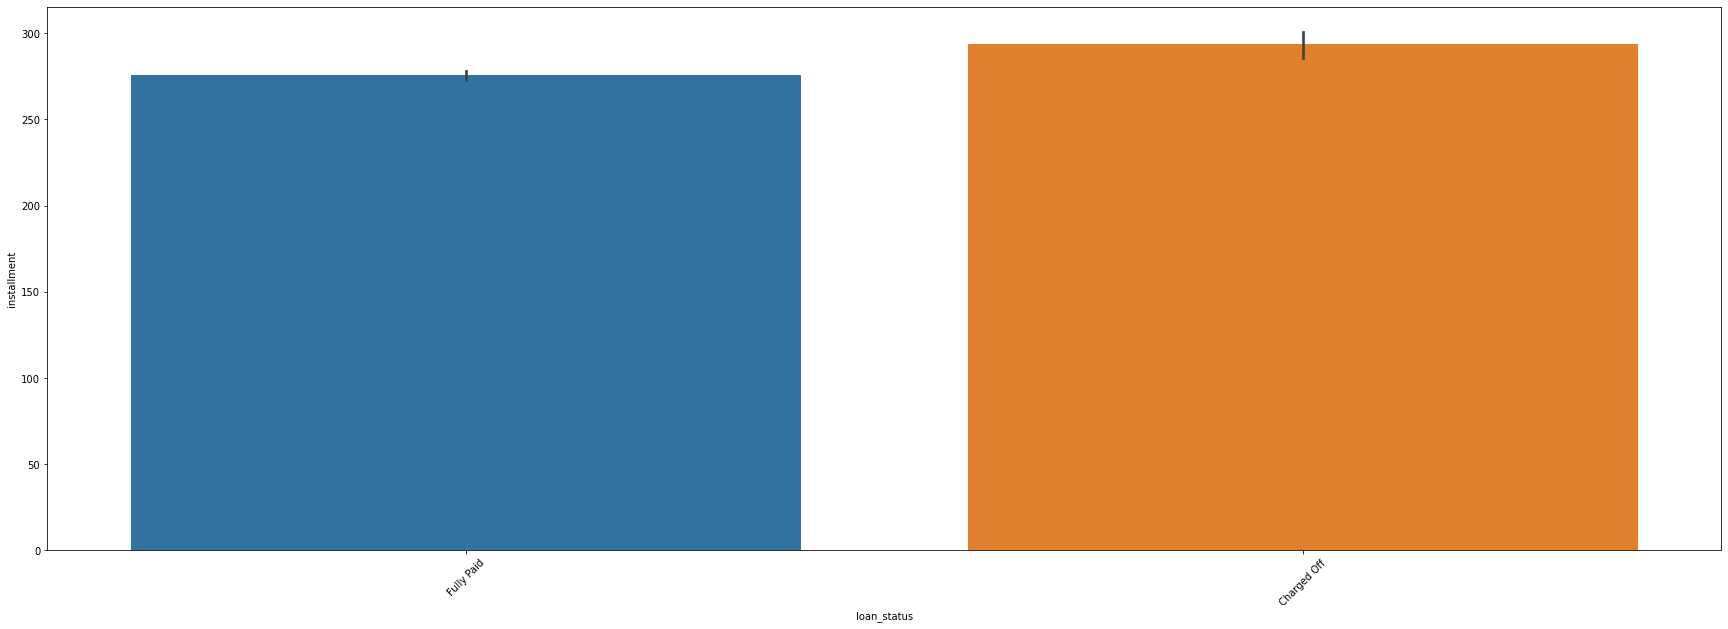

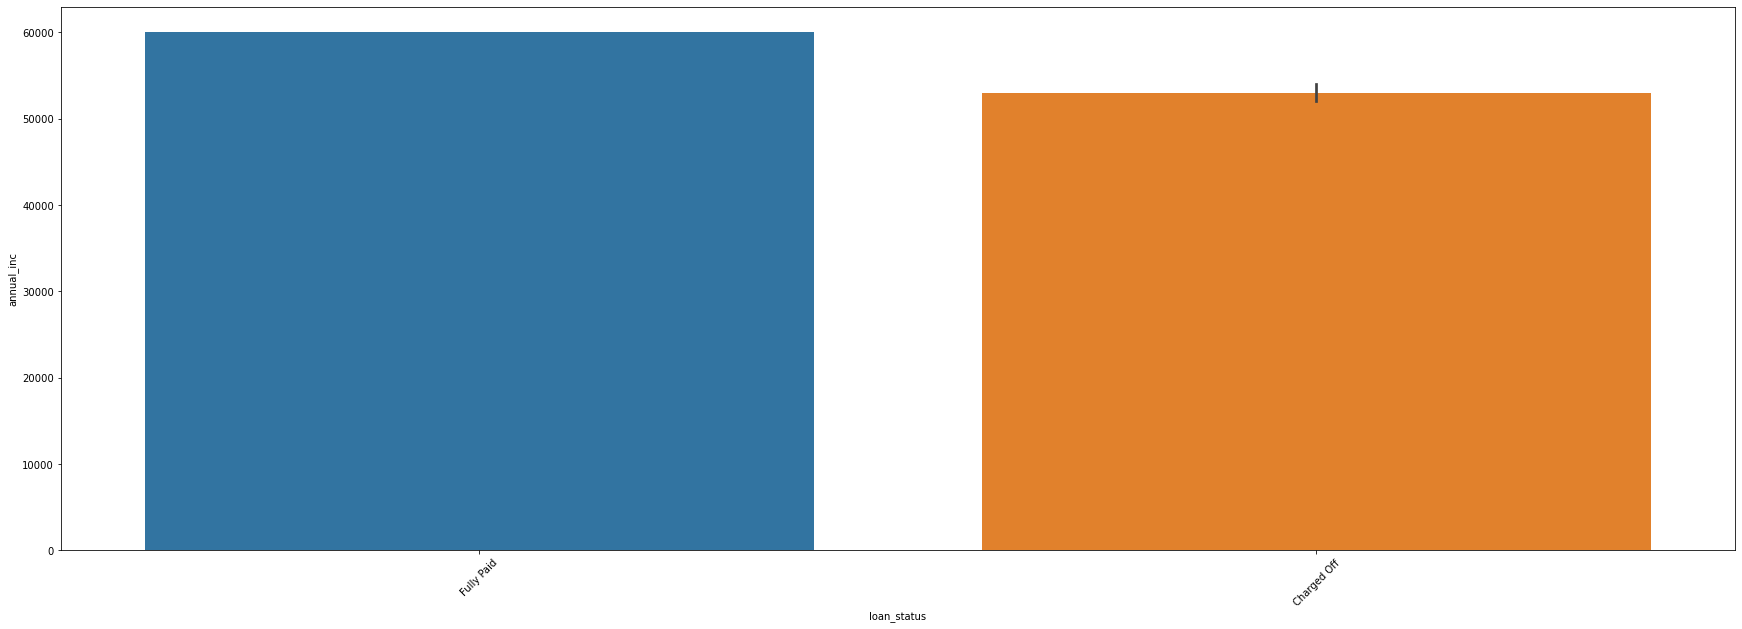

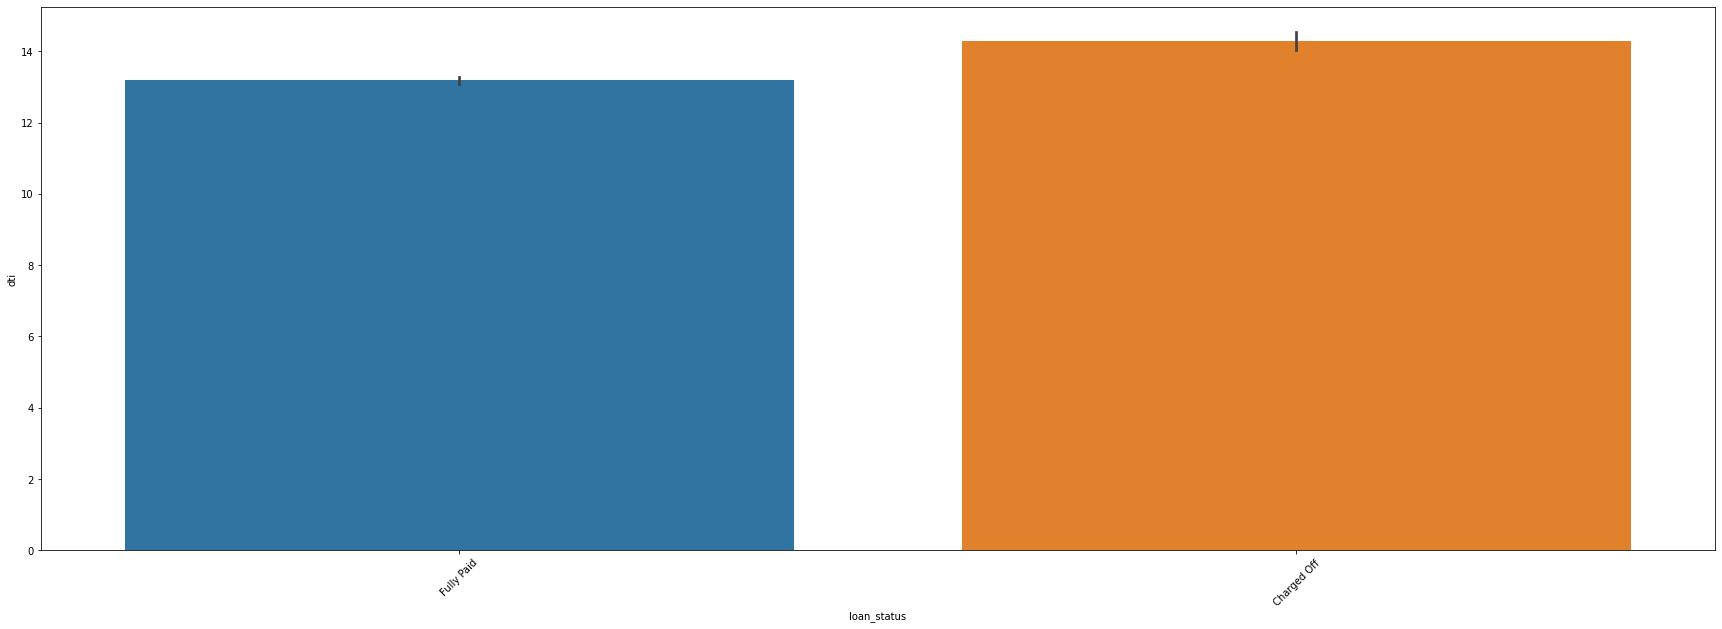

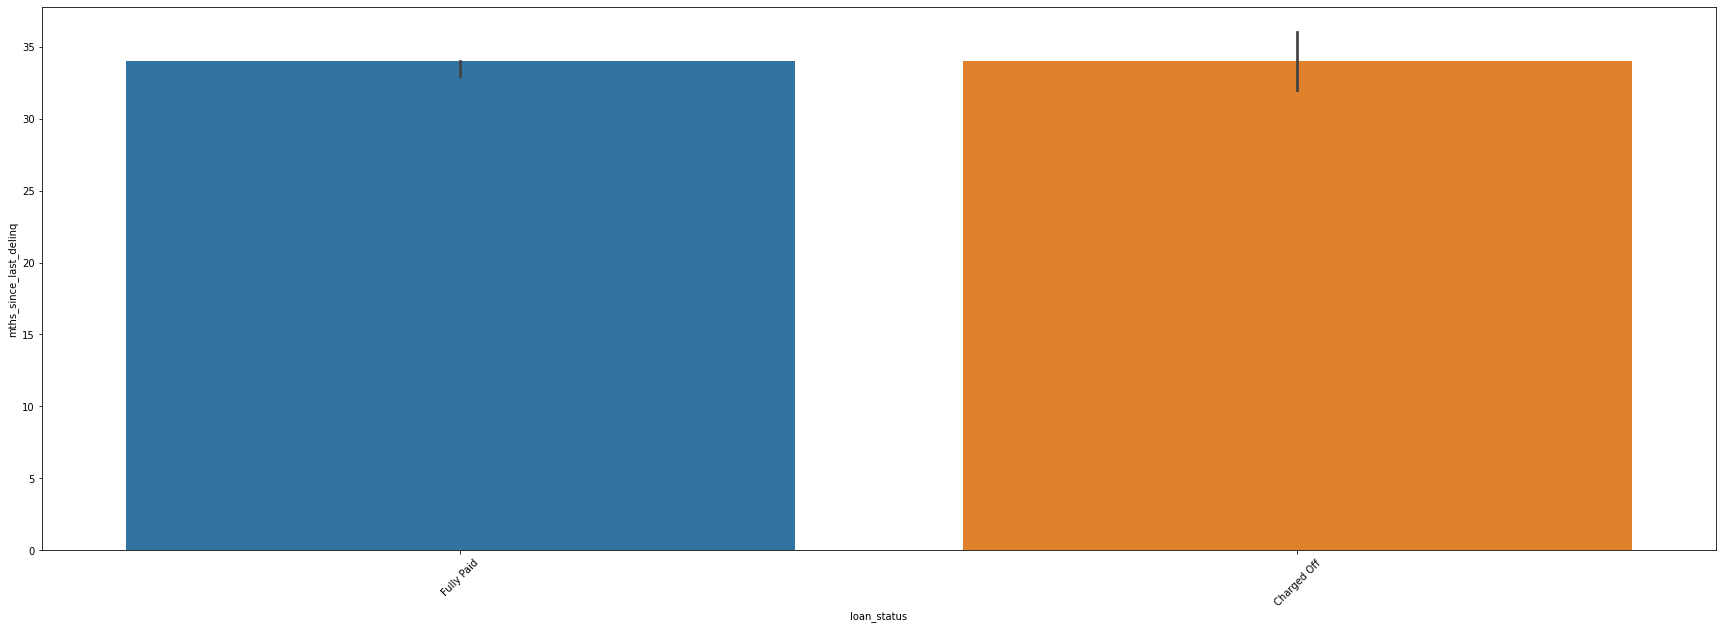

In [244]:
#Barplot
#loan_status vs continuous variables
for i in cont_variables:
    plt.figure(figsize = (30,10))
    sns.barplot(x=loan_data['loan_status'],y=loan_data[i],estimator=np.median)
    plt.xticks(rotation = 45)
    plt.show()

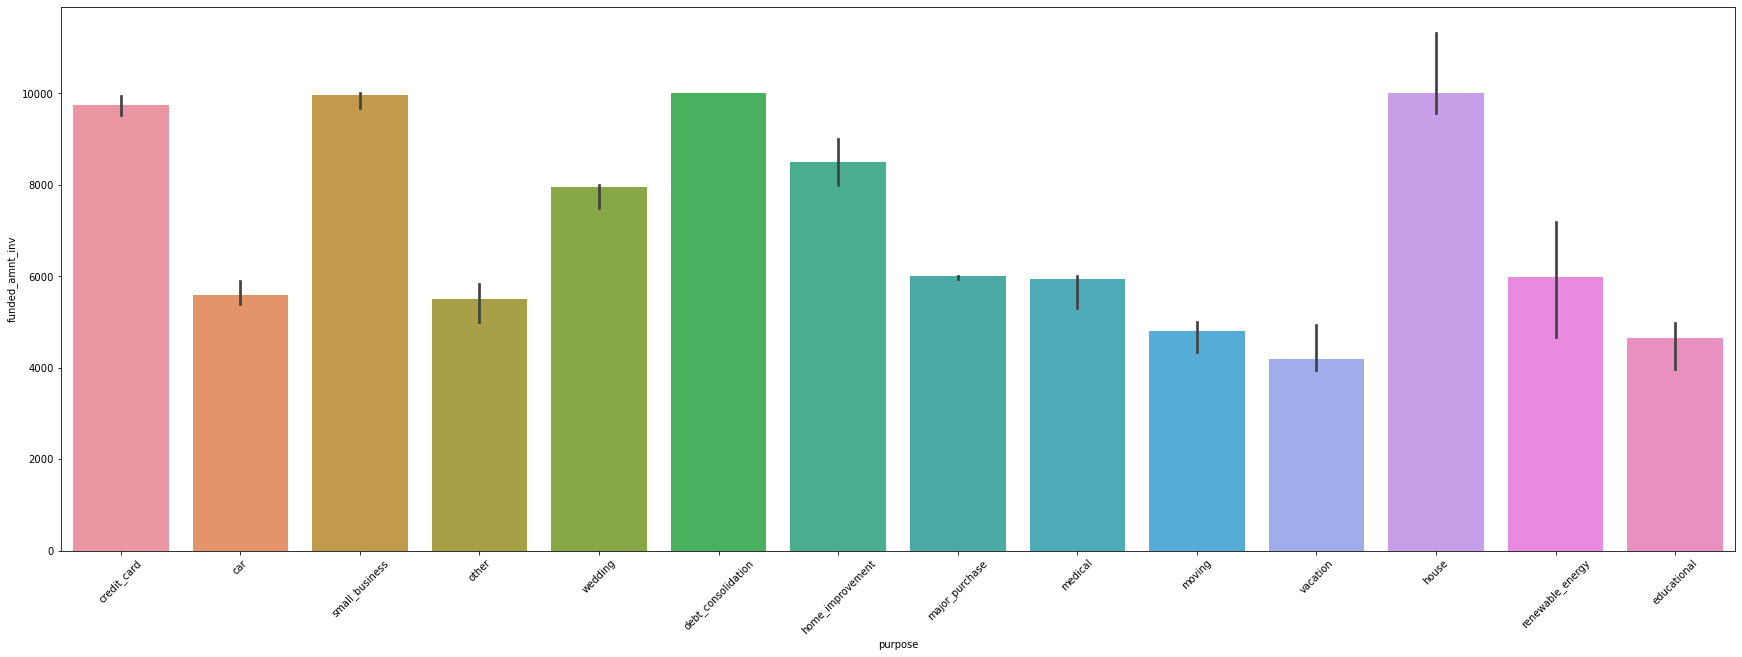

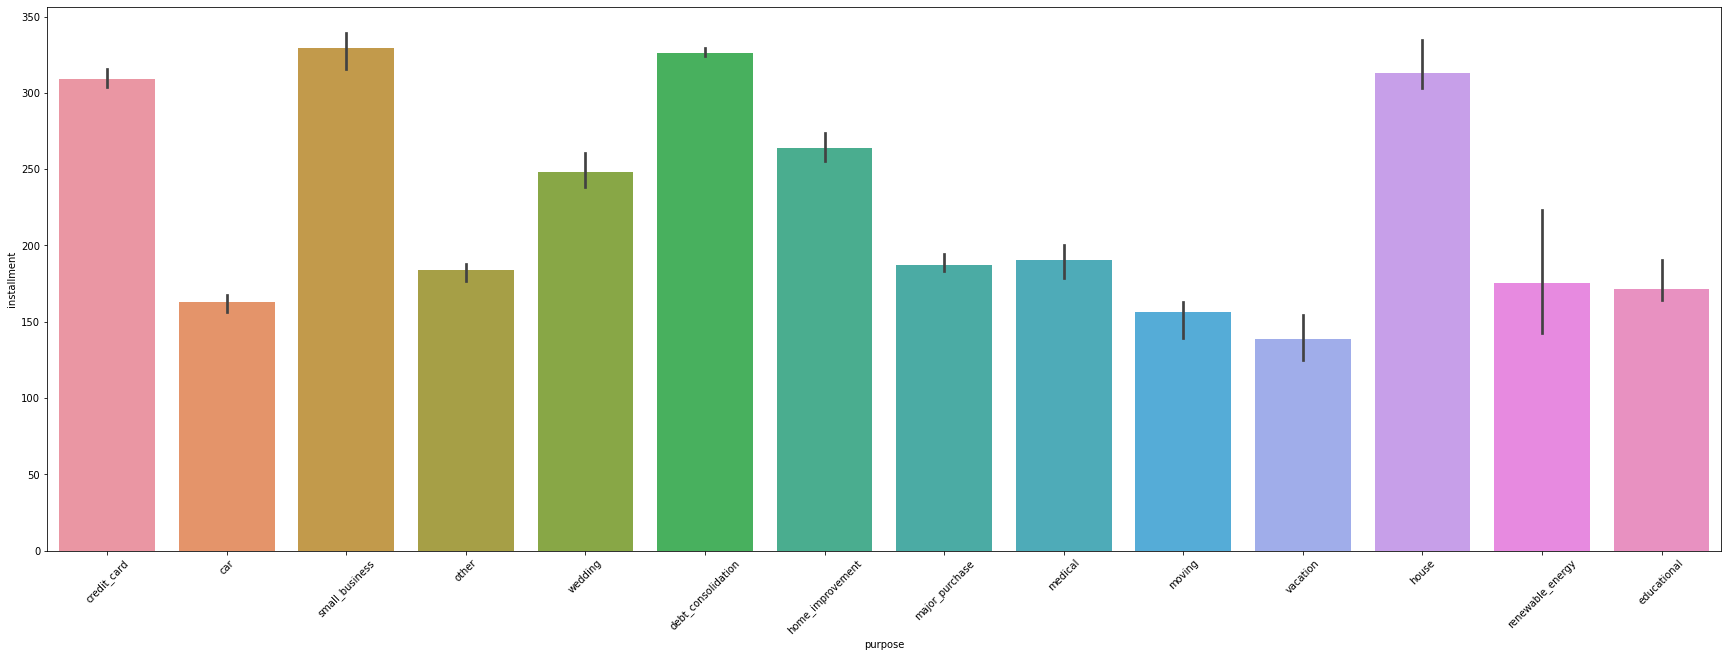

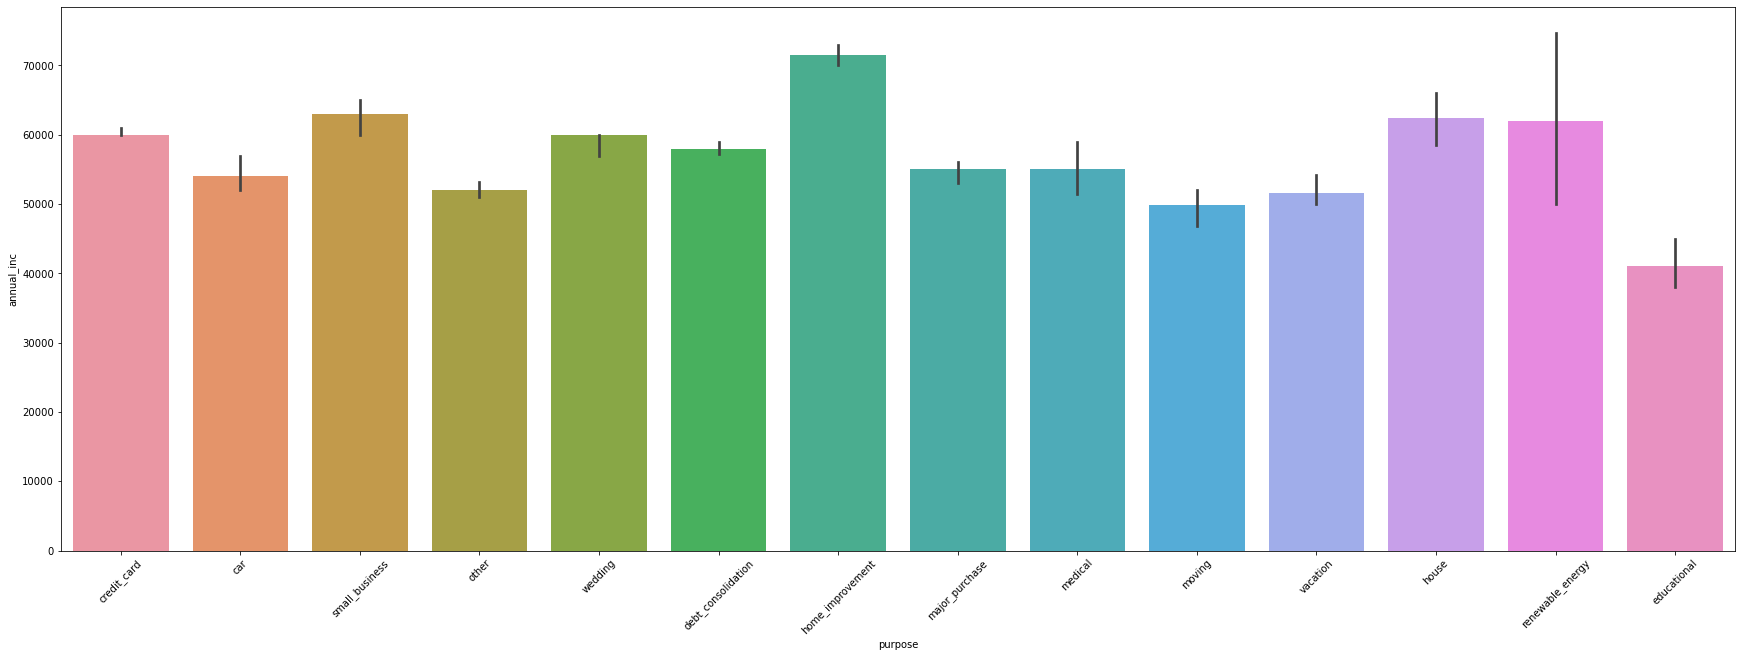

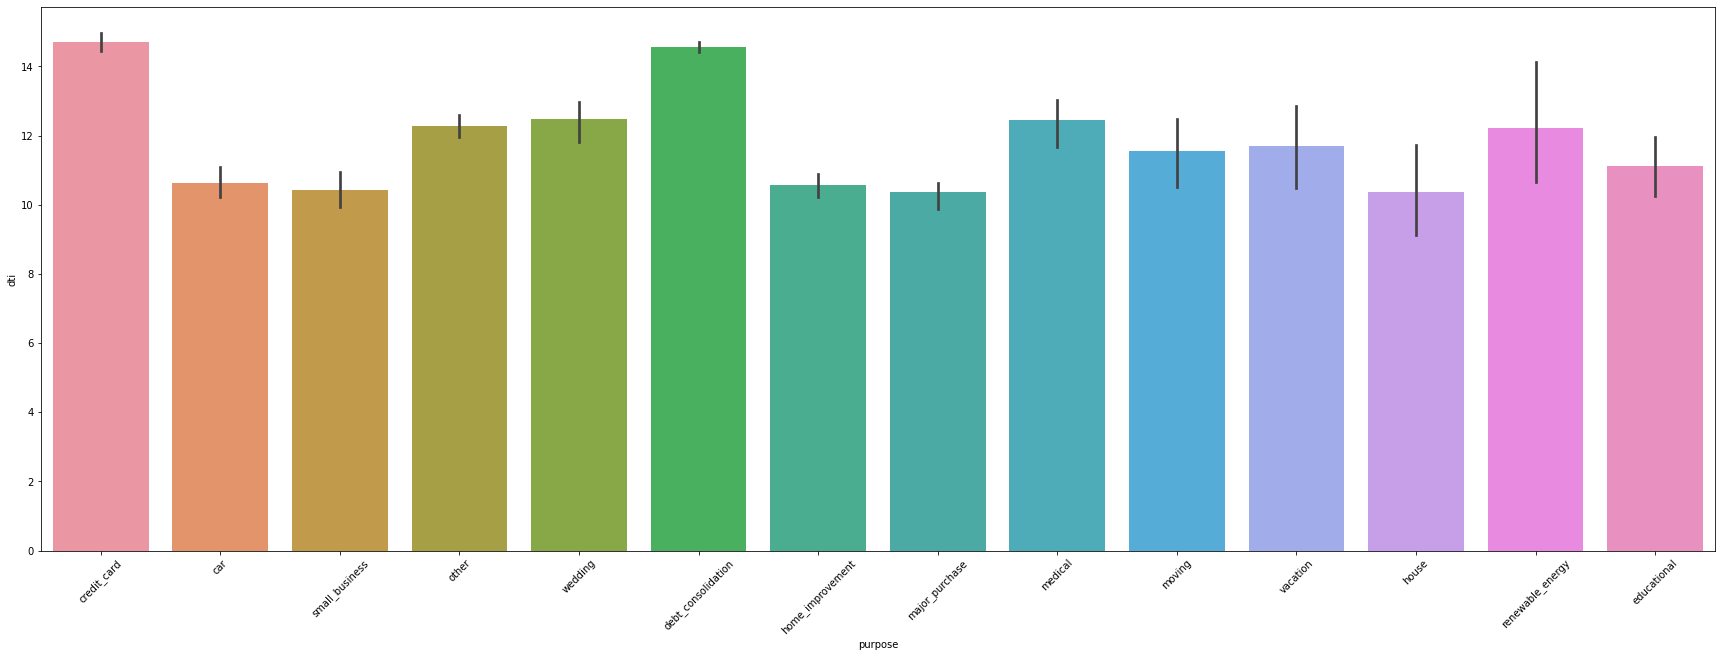

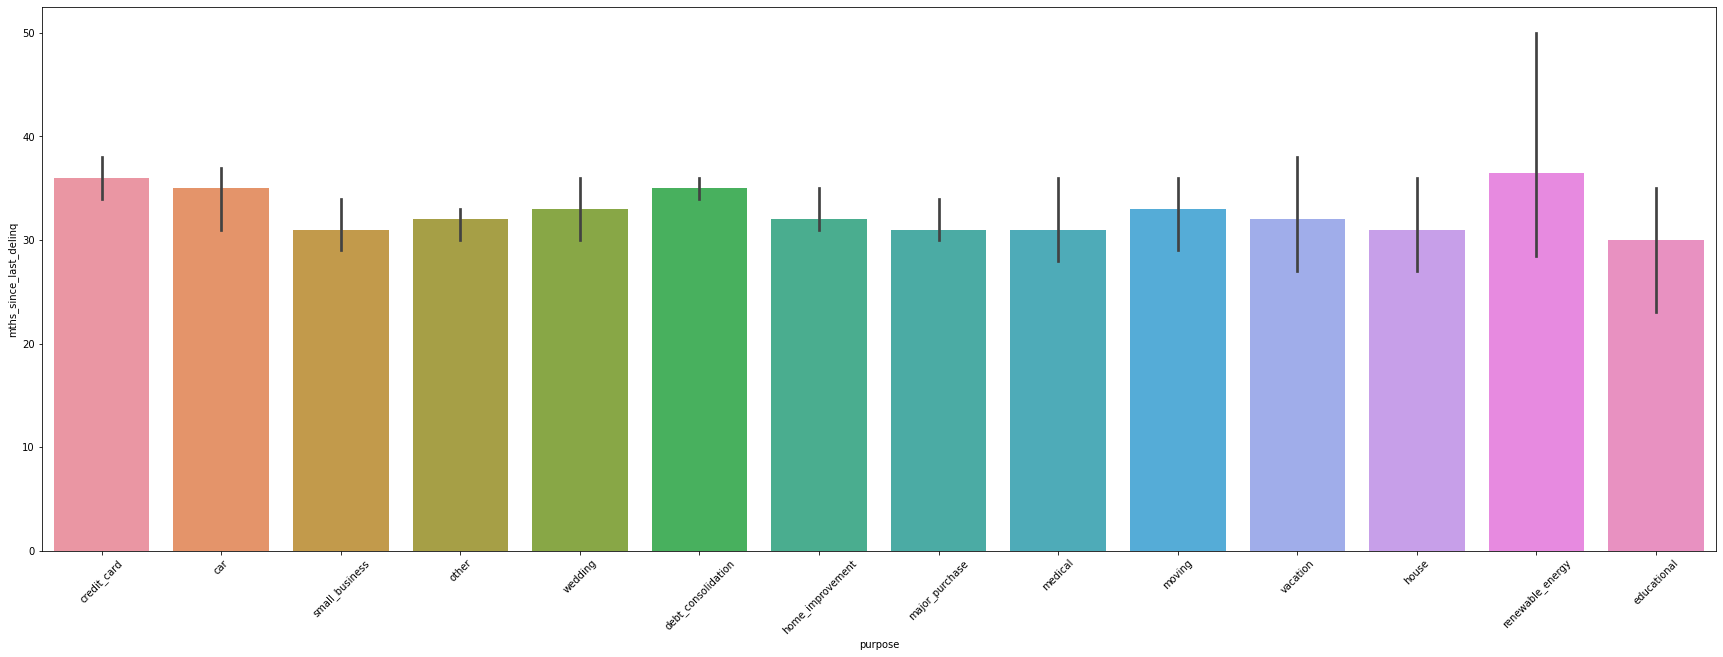

In [245]:
#Barplot
#purpose vs continuous variables
for i in cont_variables:
    plt.figure(figsize = (30,10))
    sns.barplot(x=loan_data['purpose'],y=loan_data[i],estimator=np.median)
    plt.xticks(rotation = 45)
    plt.show()

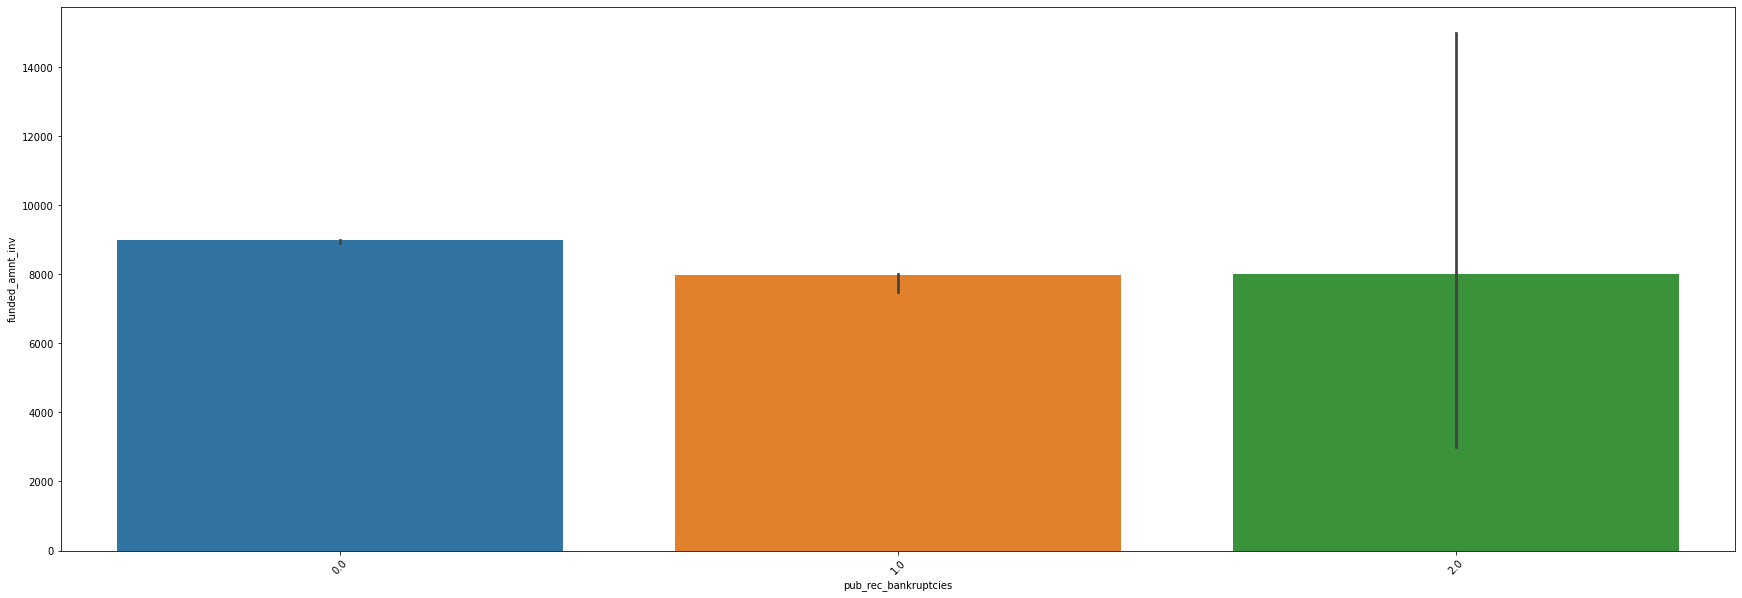

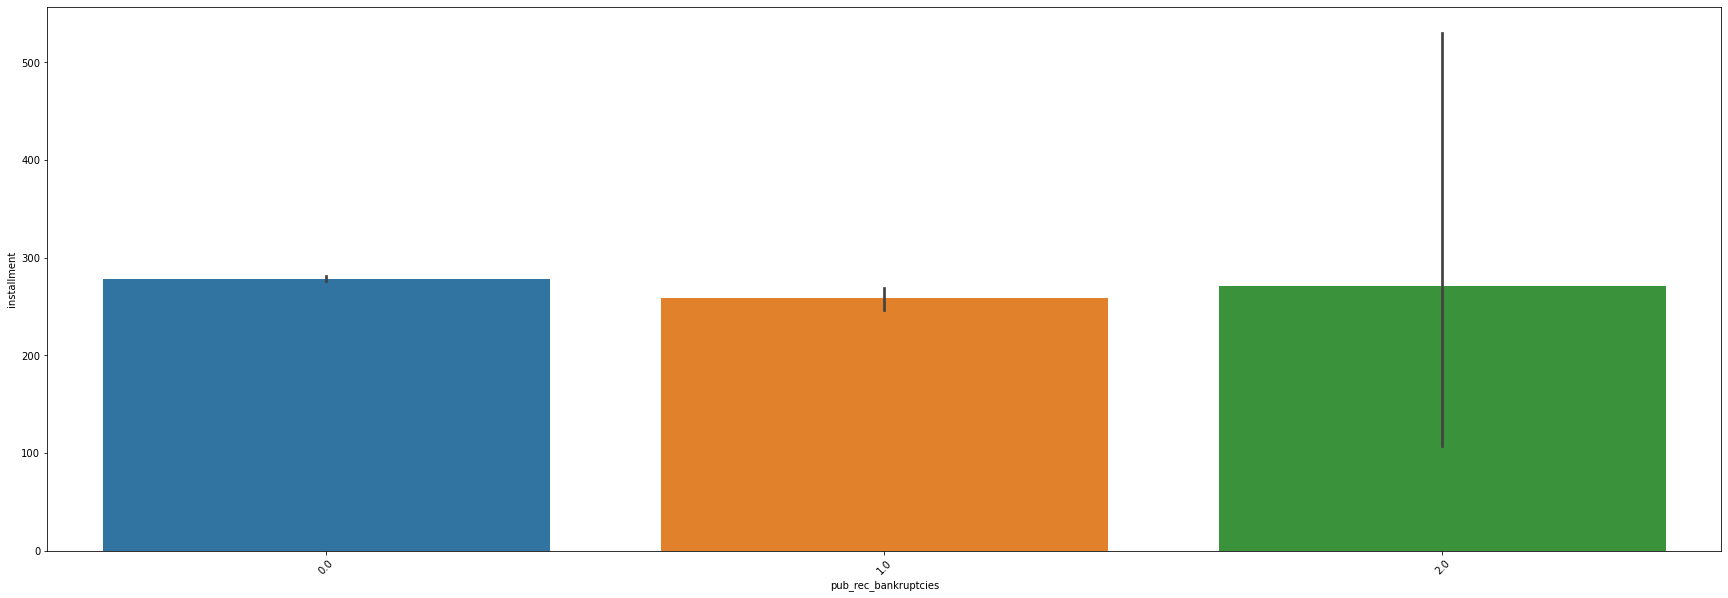

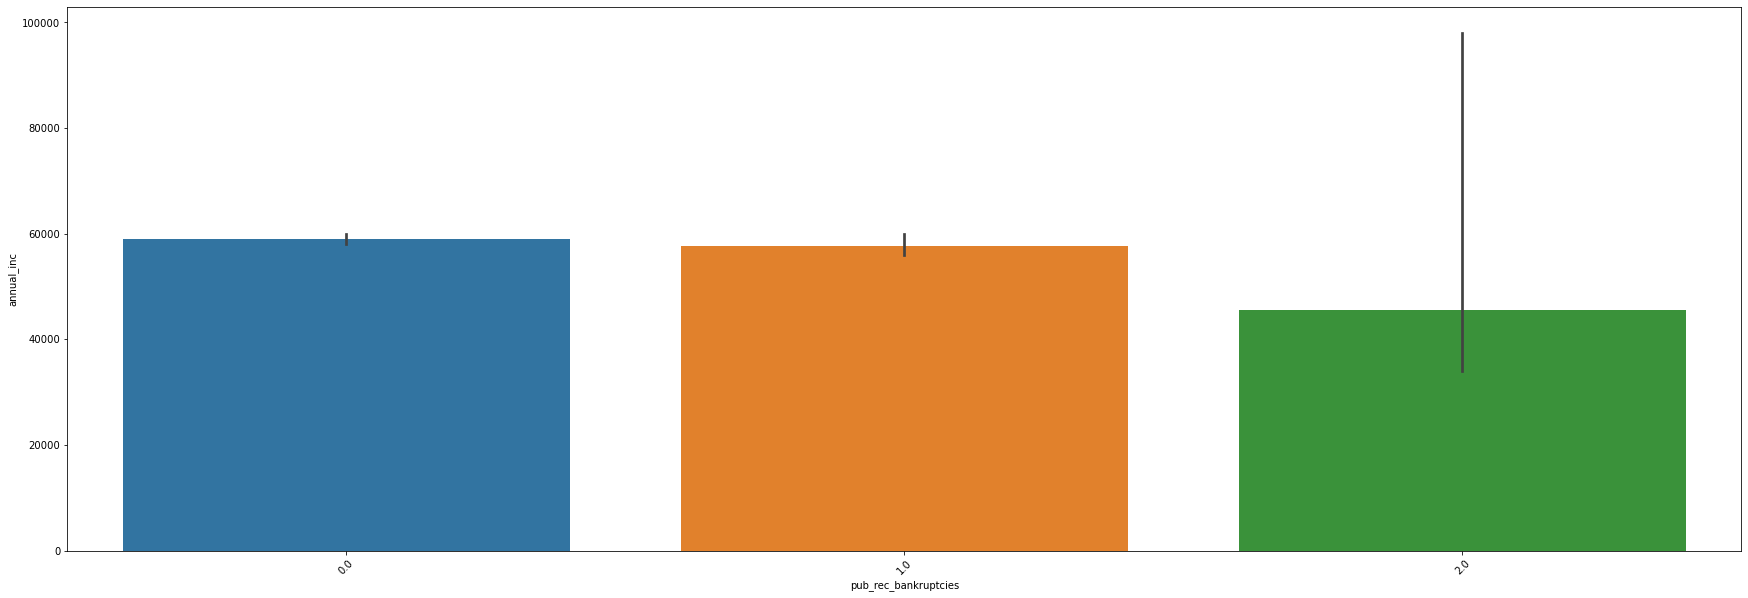

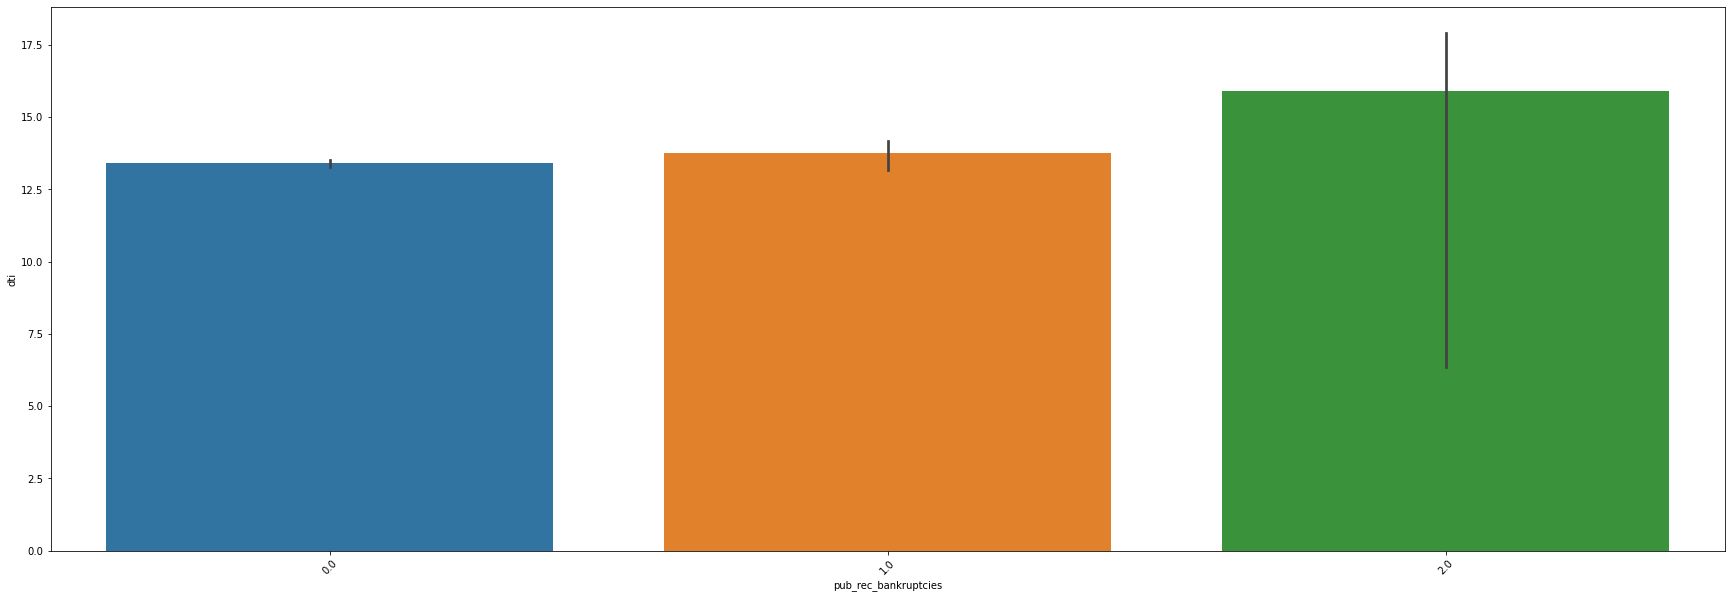

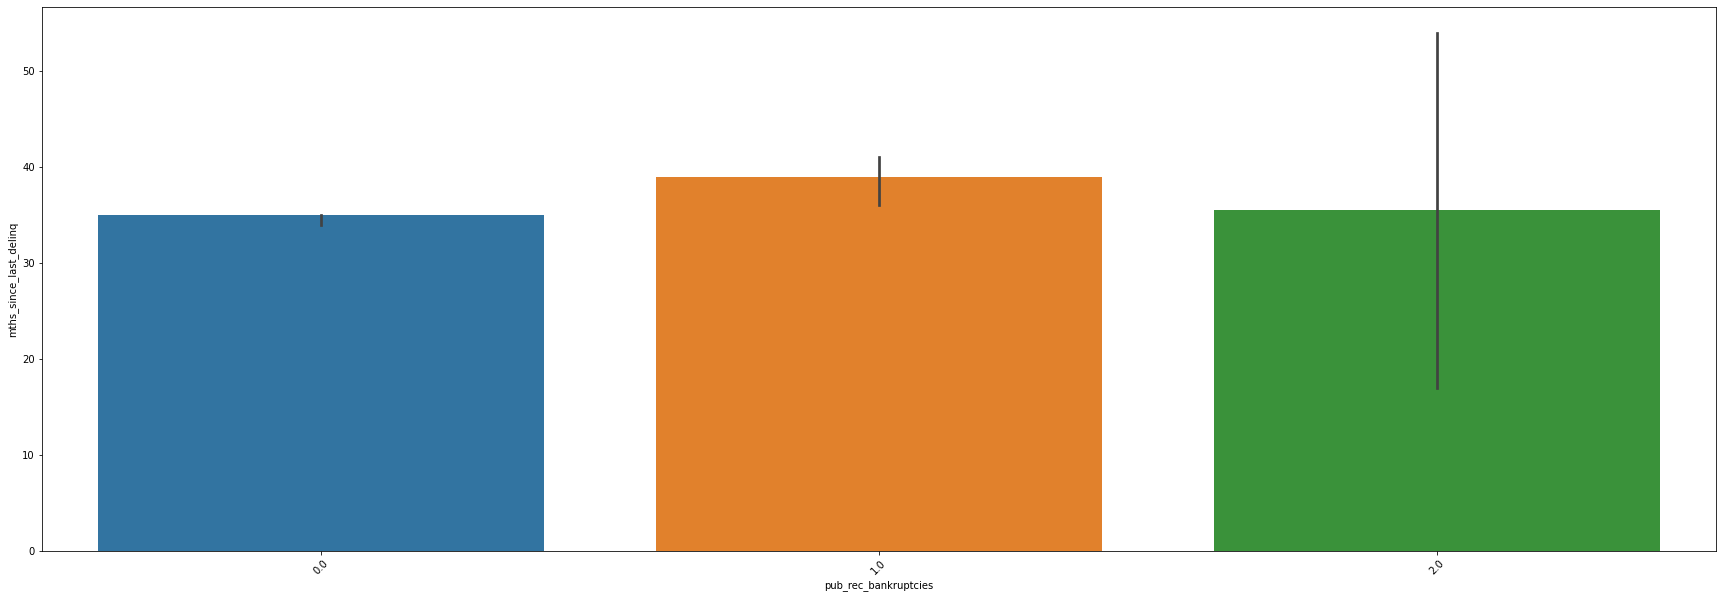

In [246]:
#Barplot
#pub_rec_bankruptcies vs continuous variables
for i in cont_variables:
    plt.figure(figsize = (30,10))
    sns.barplot(x=loan_data['pub_rec_bankruptcies'],y=loan_data[i],estimator=np.median)
    plt.xticks(rotation = 45)
    plt.show()

# Countplot Of Grade Vs Loan Status

<AxesSubplot:xlabel='grade', ylabel='count'>

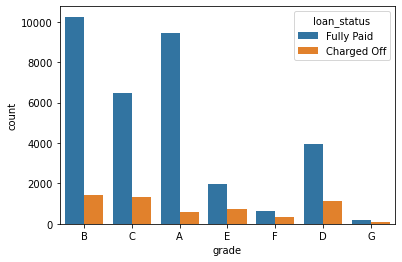

In [247]:
sns.countplot(x="grade",hue="loan_status",data=loan_data)

# Count Plot For Subgrade and Loan Status

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

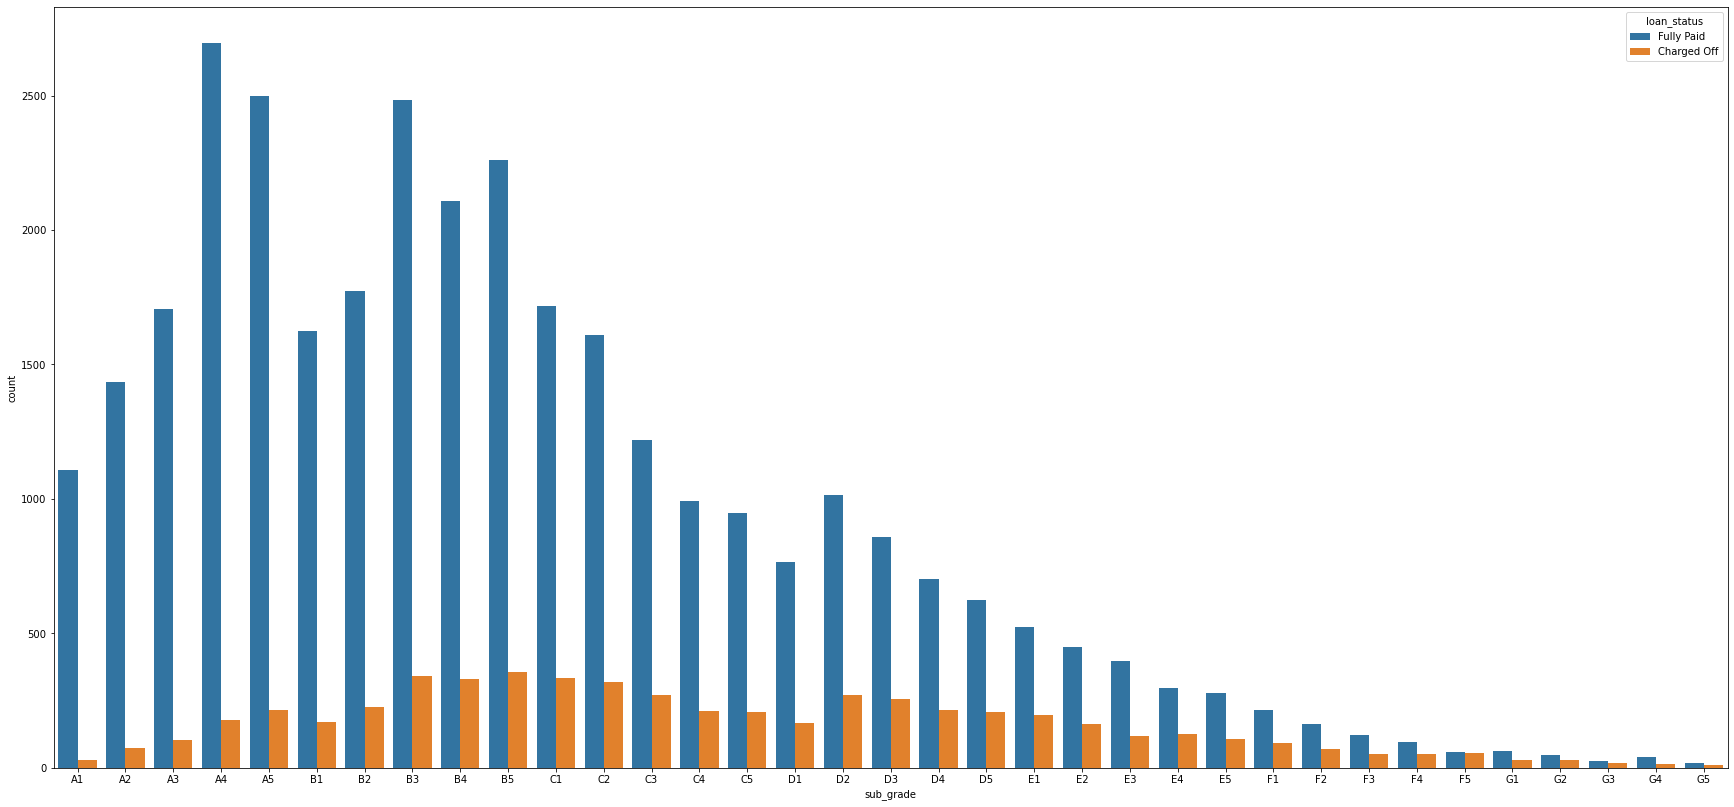

In [248]:
sub_order=sorted(loan_data["sub_grade"].unique()) # Sort subgrade in descending order
plt.figure(figsize=(30,14))
sns.countplot(x="sub_grade",hue="loan_status",order=sub_order,data=loan_data)

# Count Plot For Employment Length and Loan Status

<AxesSubplot:xlabel='emp_length', ylabel='count'>

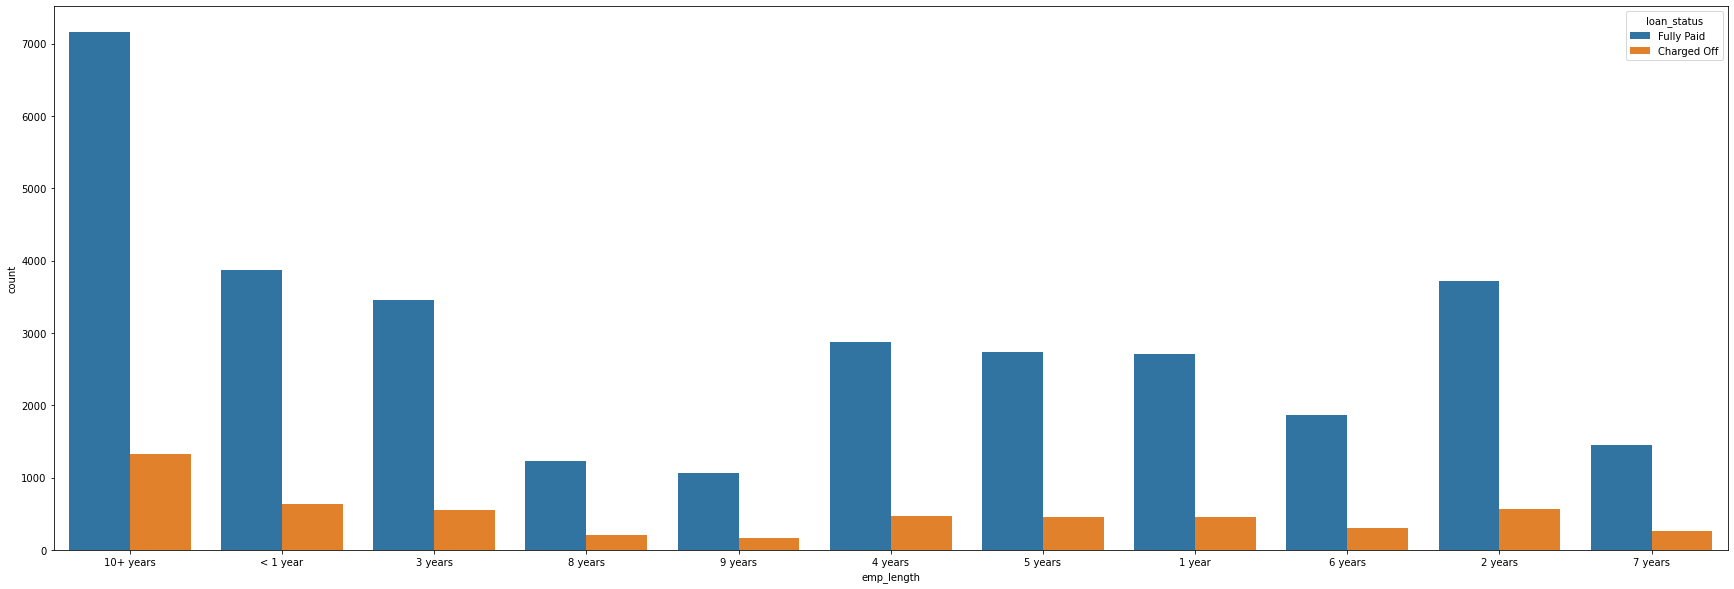

In [249]:
# Employment length of 10+ years are defaulting. Lets find out the reason.

plt.figure(figsize=(30,10))
sns.countplot(x="emp_length",hue="loan_status",data=loan_data)

<AxesSubplot:xlabel='emp_length', ylabel='count'>

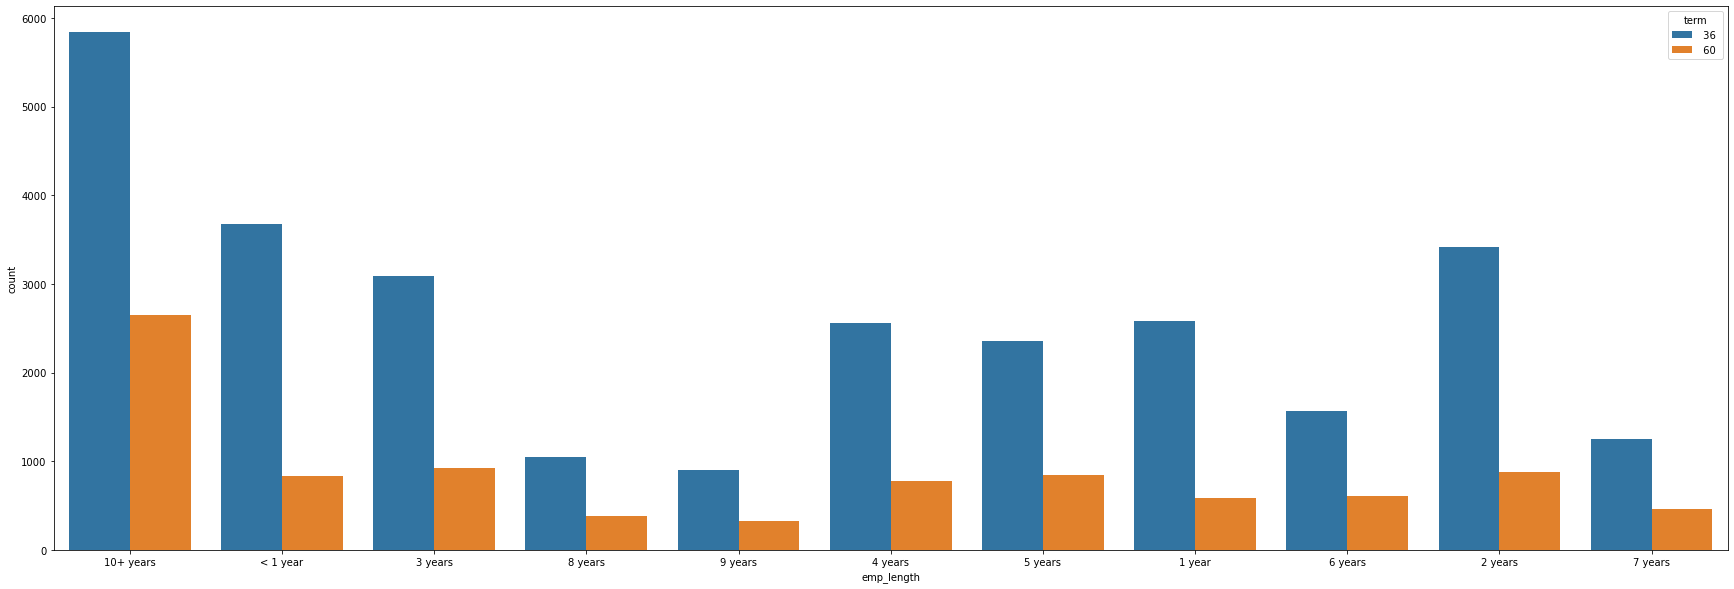

In [250]:
# 10+ year applicants are opting for lower term

plt.figure(figsize=(30,10))
sns.countplot(x="emp_length",hue="term",data=loan_data)

<AxesSubplot:xlabel='emp_length', ylabel='funded_amnt_inv'>

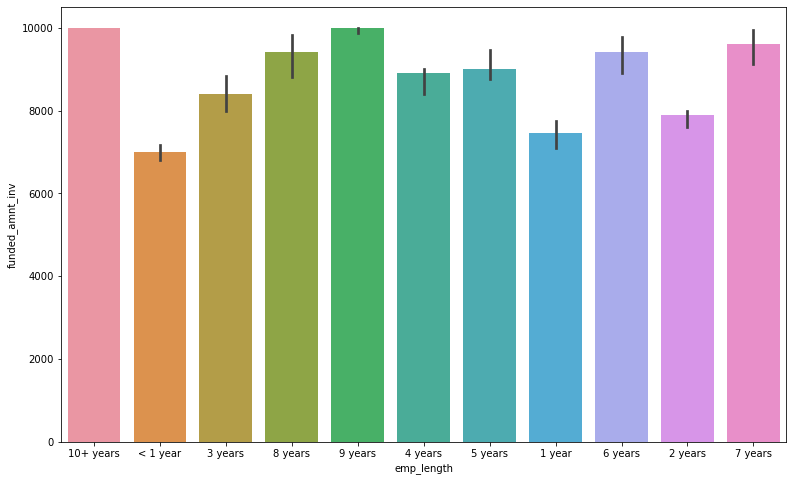

In [251]:
# 10+ year applicants are opting for higher funded_amnt_inv
plt.figure(figsize=(13,8))
sns.barplot(x=loan_data['emp_length'],y=loan_data['funded_amnt_inv'],estimator=np.median)

<AxesSubplot:xlabel='emp_length', ylabel='count'>

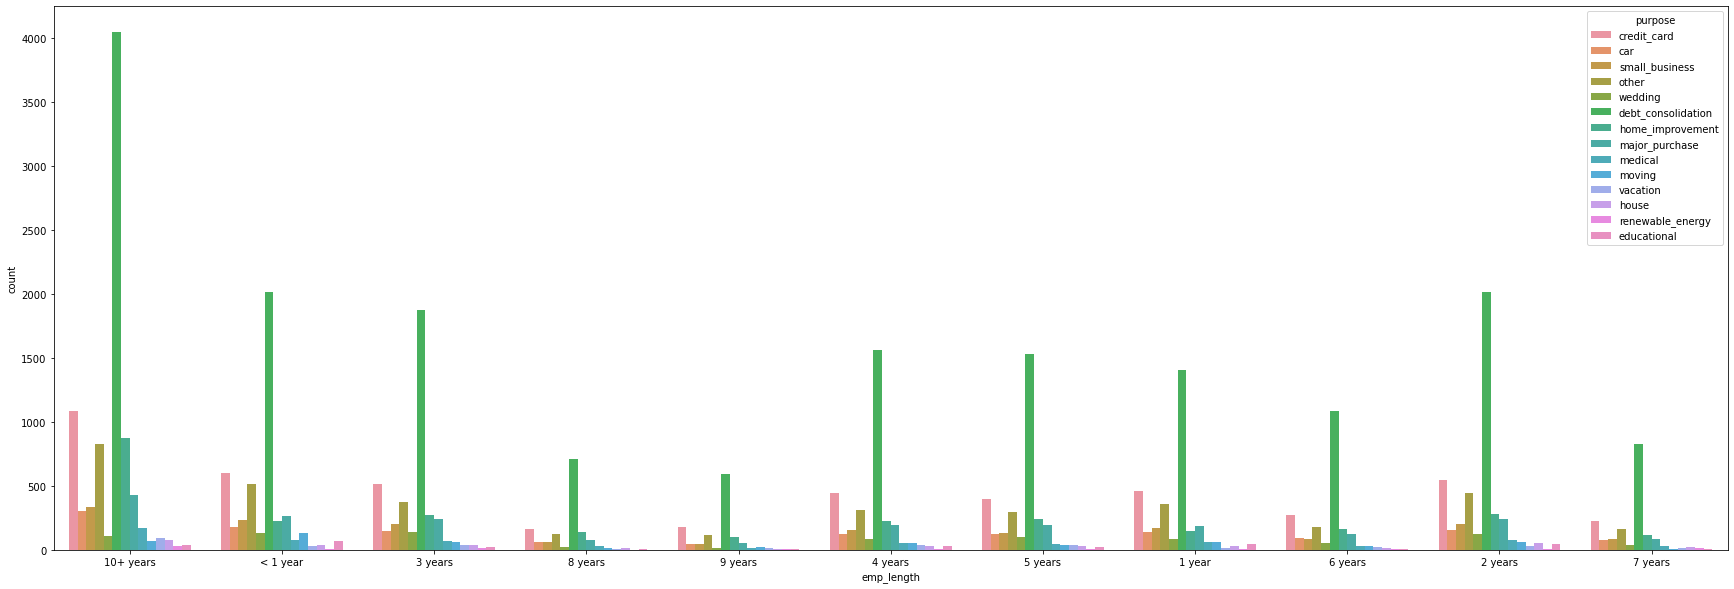

In [252]:
# 10+ year applicants are opting for lower term

plt.figure(figsize=(30,10))
sns.countplot(x="emp_length",hue="purpose",data=loan_data)

<AxesSubplot:xlabel='emp_length', ylabel='count'>

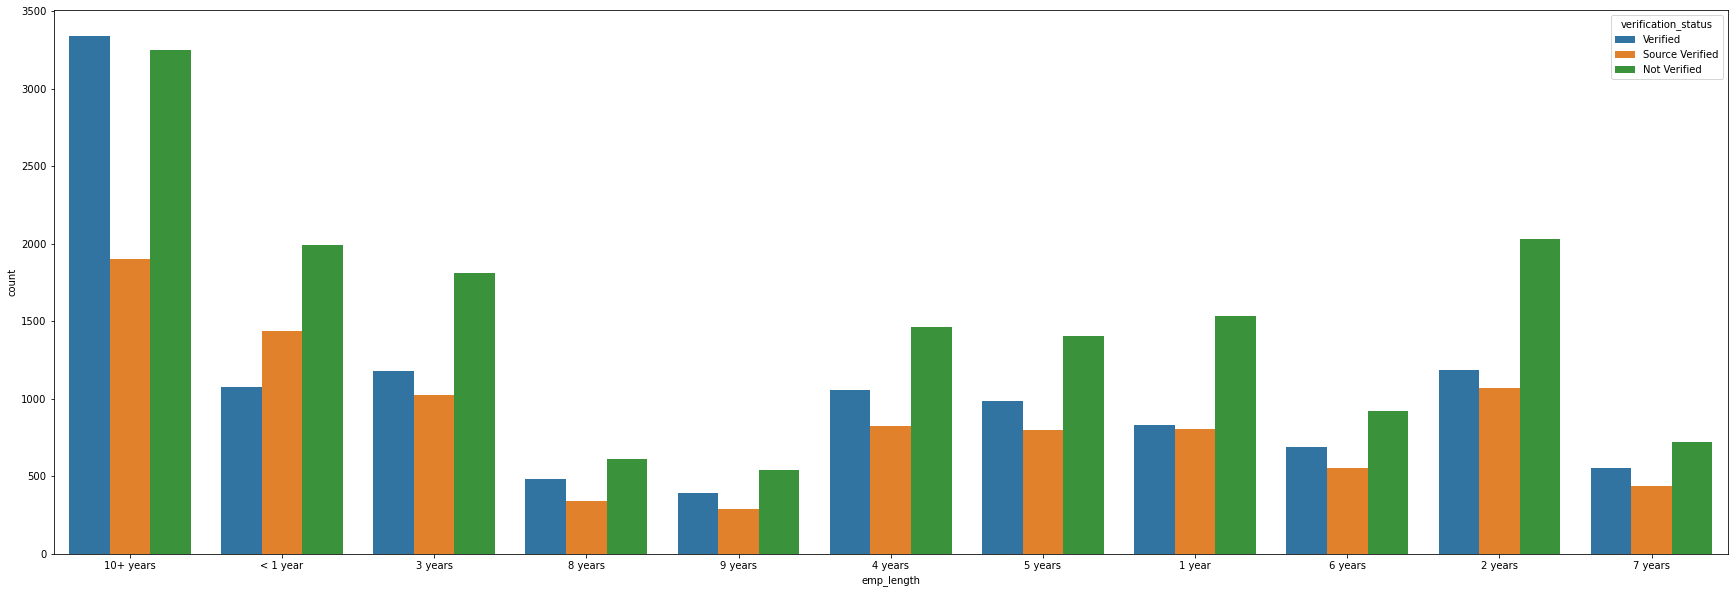

In [253]:
# 10+ year applicants are opting are in the highest count for not verified

plt.figure(figsize=(30,10))
sns.countplot(x="emp_length",hue="verification_status",data=loan_data)

<AxesSubplot:xlabel='emp_length', ylabel='count'>

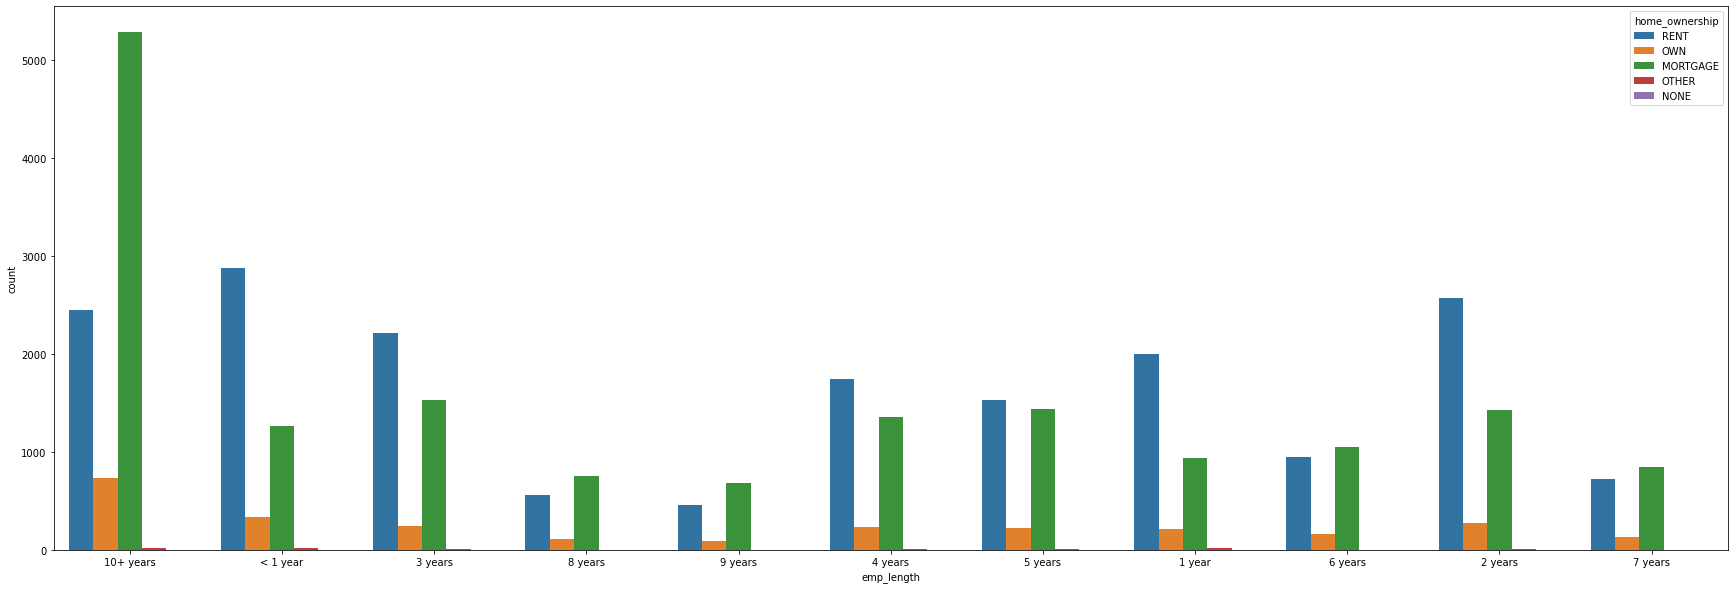

In [254]:
# 10+ year applicants are maximum whose home ownership status is Mortgage

plt.figure(figsize=(30,10))
sns.countplot(x="emp_length",hue="home_ownership",data=loan_data)

<AxesSubplot:xlabel='loan_status', ylabel='count'>

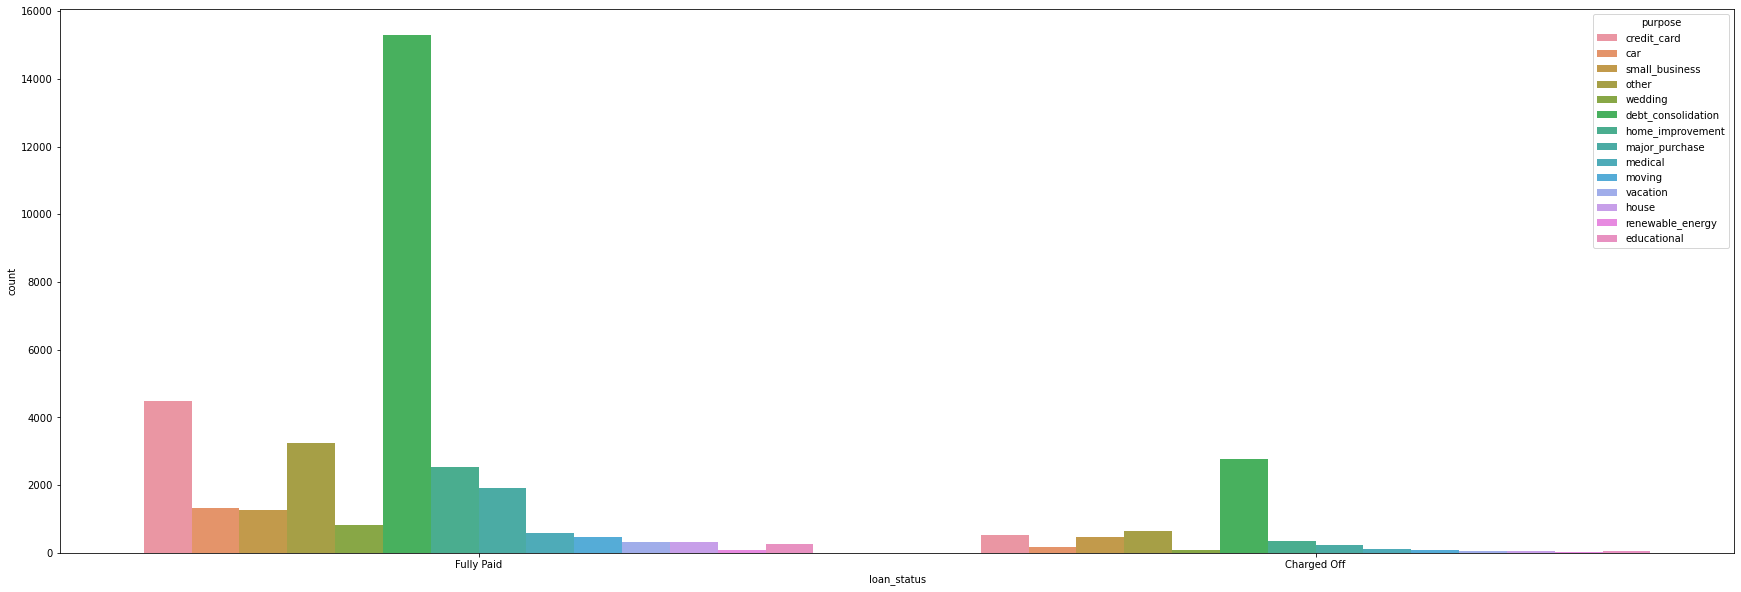

In [255]:
#Loan status vs purpose
    
plt.figure(figsize=(30,10))
sns.countplot(x="loan_status",hue="purpose",data=loan_data)

# Count Plot For Verfication Status and Loan Status

<AxesSubplot:xlabel='verification_status', ylabel='count'>

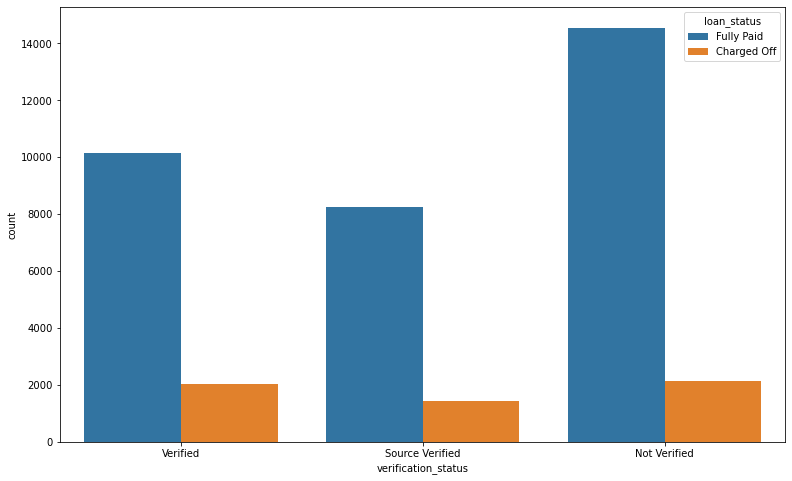

In [256]:
plt.figure(figsize=(13,8)) # Defining figure size
sns.countplot(x="verification_status",hue="loan_status",data=loan_data) # Countplot generation

<AxesSubplot:xlabel='term', ylabel='count'>

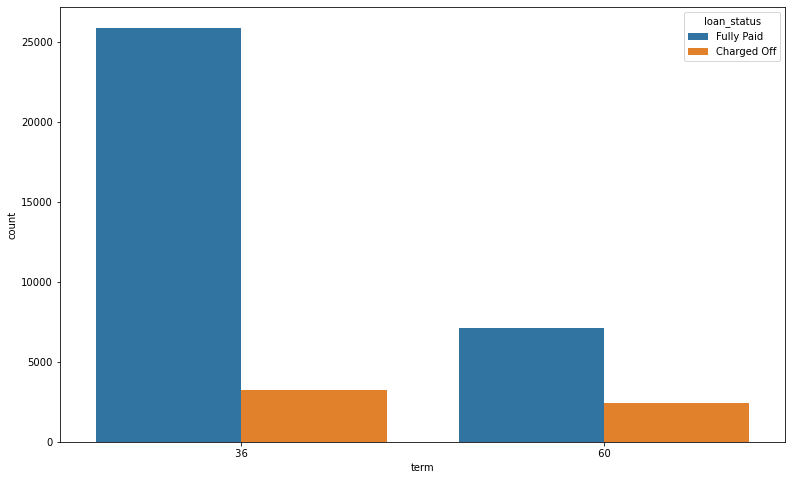

In [257]:
plt.figure(figsize=(13,8)) #Defining figure size
sns.countplot(x="term",hue="loan_status",data=loan_data) #Countplot generation

#  Distplot for Loan Applied Vs Amount Funded By The Organization

Text(0.5, 1.0, 'Amount Funded by the Organization')

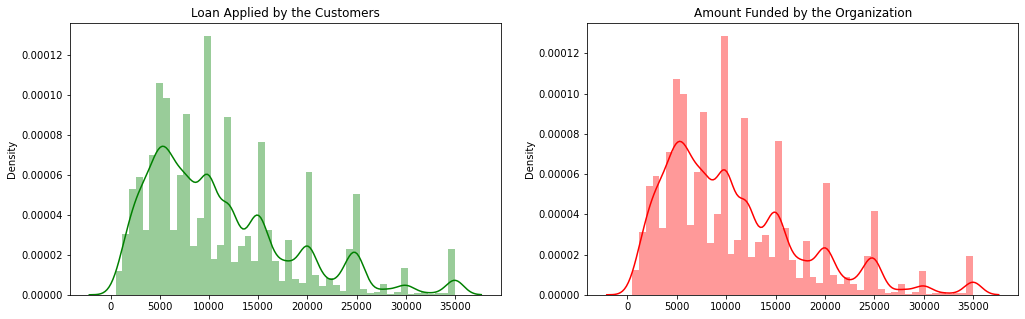

In [258]:
fig, ax = plt.subplots(1, 2, figsize=(17,5))# Creating two subplots

loan_amount = loan_data["loan_amnt"].values #Loading loan amount detail to loan_amount variable
funded_amount = loan_data["funded_amnt"].values #Loading funded_amnt details to funded_amount variable


sns.distplot(loan_amount,ax=ax[0],  color='Green') #Distplot generation for loan amount
ax[0].set_title("Loan Applied by the Customers", fontsize=12) #Setting title as Loan Applied by the Customers
sns.distplot(funded_amount, ax=ax[1],color='Red') #Distplot generation for funded_amount
ax[1].set_title("Amount Funded by the Organization", fontsize=12) #setting title for Amount Funded by the Organization

# Plot For Interest Rate Vs Grade

<AxesSubplot:xlabel='grade', ylabel='int_rate1'>

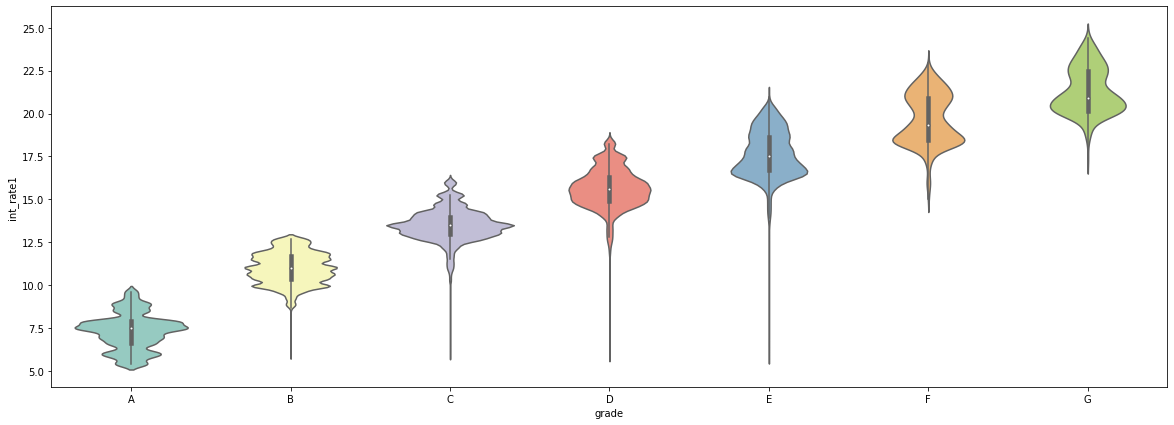

In [259]:
# Replace % character from interest rate and convert it to float type

loan_data["int_rate1"]=loan_data["int_rate"].apply(lambda x:x.replace("%","")).astype("float")

#Interest rate distribution by customer grade

plt.figure(figsize=(20,7))
sns.violinplot(x='grade', y='int_rate1', data=loan_data, palette = "Set3", order=['A','B','C','D','E','F','G'])

# Heatmap and Correlation Plot

<AxesSubplot:>

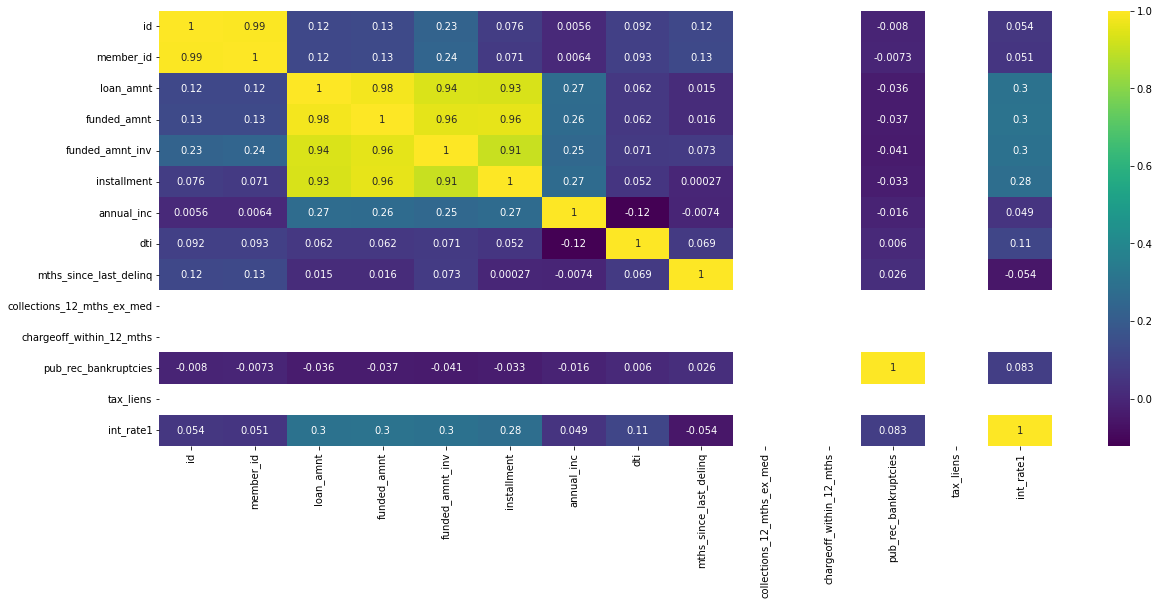

In [260]:
plt.figure(figsize=(20,8)) # Defining Figure Size
sns.heatmap(loan_data.corr(),annot=True,cmap="viridis") # Heatmap generation